In [60]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import matplotlib.pyplot as plt
import os
import pdb
import numpy as np
import numpy.random as npr
import tensorflow as tf
import sys
from scipy import linalg as LA
import datetime
import re
import json

import getpass
ui = getpass.getuser()
if ui == 'laura':
    p = '/home/laura'
elif ui == 'lauradriscoll':
    p = '/Users/lauradriscoll/Documents'
elif ui == 'lndrisco':
    p = '/home/users/lndrisco'

net = 'stepnet'#'highd_inputs'#
PATH_YANGNET = os.path.join(p,'code/multitask-nets',net)

PATH_YANGNET = os.path.join(p,'code/multitask-nets',net)

sys.path.insert(0, PATH_YANGNET)
from task import generate_trials, rule_name, rule_index_map, rules_dict
from network import Model
from tools_lnd import name_best_ckpt, gen_trials_from_model_dir, get_stim_cats
from task import generate_trials, rule_name
import tools
import imageio


In [61]:
def load_X_from_model_dir(model_dir,rule,mode = 'random',noise = True):    
    model = Model(model_dir)
    with tf.Session() as sess:
        model.saver.restore(sess,ckpt_n_dir)
        hparams = model.hp
        trial = generate_trials(rule, hparams, mode=mode, batch_size = 2, noise_on=noise, delay_fac =1)
        feed_dict = tools.gen_feed_dict(model, trial, hparams)
        h_tf, y_hat = sess.run([model.h, model.y_hat], feed_dict=feed_dict) #(n_time, n_condition, n_neuron)
            
    return h_tf, y_hat, hparams, trial

def plot_epoch_division(trial):
    for e in trial.epochs.keys():
        plt.text(10*np.max([trial.epochs[e][0],0])+20,-1,e,rotation = 0)
        if trial.epochs[e][1]>0:
            plt.plot([10*(trial.epochs[e][1]-1),10*(trial.epochs[e][1]-1)],[-1.5,1.5],':k',linewidth = 2,alpha = .5)
    plt.ylim((-1.3,1.3))

In [62]:
rule = 'delaygo'
model_n = 0
if net is 'stepnet':
    dir_specific_all = net+'/crystals/softplus/l2w0001'#'crystals/softplus/l2h00001'#'crystals/softplus/no_reg'#s'crystals/softplus/l2h00001'#'tepnet/crystals/softplus/'#grad_norm_both/'#'lowD/combos'#'stepnet/lowD/tanh'#'lowD/grad_norm_l2001' #' #'lowD/armnet_noreg'#lowD/combos' ##grad_norm_l2h000001' /Documents/data/rnn/multitask/varGo/lowD/most/
elif net is 'highd_inputs':
    dir_specific_all = 'crystals/highd_inputs/all_rules_4/softplus/no_reg_tune_width'#'crystals/softplus/l2h00001'#'stepnet/crystals/softplus/'#grad_norm_both/'#'lowD/combos'#'stepnet/lowD/tanh'#'lowD/grad_norm_l2001' #' #'lowD/armnet_noreg'#lowD/combos' ##grad_norm_l2h000001' /Documents/data/rnn/multitask/varGo/lowD/most/
#     dir_specific_all = 'crystals/highd_inputs/all_rules_32/softplus/l2h00001_l2w0001'#'crystals/softplus/l2h00001'#'stepnet/crystals/softplus/'#grad_norm_both/'#'lowD/combos'#'stepnet/lowD/tanh'#'lowD/grad_norm_l2001' #' #'lowD/armnet_noreg'#lowD/combos' ##grad_norm_l2h000001' /Documents/data/rnn/multitask/varGo/lowD/most/
elif net is 'armnet':
    dir_specific_all = 'lowD/armnet_noreg/most/'#'crystals/softplus/l2h00001'#'stepnet/crystals/softplus/'#grad_norm_both/'#'lowD/combos'#'stepnet/lowD/tanh'#'lowD/grad_norm_l2001' #' #'lowD/armnet_noreg'#lowD/combos' ##grad_norm_l2h000001' /Documents/data/rnn/multitask/varGo/lowD/most/
#     dir_specific_all = 'crystals/highd_inputs/all_rules_32/softplus/l2h00001_l2w0001'#'crystals/softplus/l2h00001'#'stepnet/crystals/softplus/'#grad_norm_both/'#'lowD/combos'#'stepnet/lowD/tanh'#'lowD/grad_norm_l2001' #' #'lowD/armnet_noreg'#lowD/combos' ##grad_norm_l2h000001' /Documents/data/rnn/multitask/varGo/lowD/most/
model_dir_all = os.path.join(p,'data/rnn/multitask/',dir_specific_all,str(model_n))
ckpt_n = name_best_ckpt(model_dir_all,rule)
ckpt_n_dir = os.path.join(model_dir_all,'ckpts/model.ckpt-' + str(int(ckpt_n)))

task_list = ['fdgo', 'reactgo', 'delaygo', 'fdanti', 'reactanti', 'delayanti',
              'delaydm1', 'delaydm2', 'contextdelaydm1', 'contextdelaydm2', 'multidelaydm',
              'dmsgo', 'dmsnogo', 'dmcgo', 'dmcnogo']

rule_set_names = ['DelayGo', 'ReactGo', 'MemoryGo', 'DelayAnti', 'ReactAnti', 'MemoryAnti',
              'Decison1', 'Decison2', 'ContextDecison1', 'ContextDecison2', 'MultiDecison',
              'DelayDecison1', 'DelayDecison2', 'ContextDelayDecison1', 'ContextDelayDecison2', 'MultiDelayDecison',
              'DelayMatch2SampleGo', 'DelayMatch2SampleNogo', 'DelayMatch2CategoryGo', 'DelayMatch2CategoryNoGo']


0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/ckpts/model.ckpt-179000


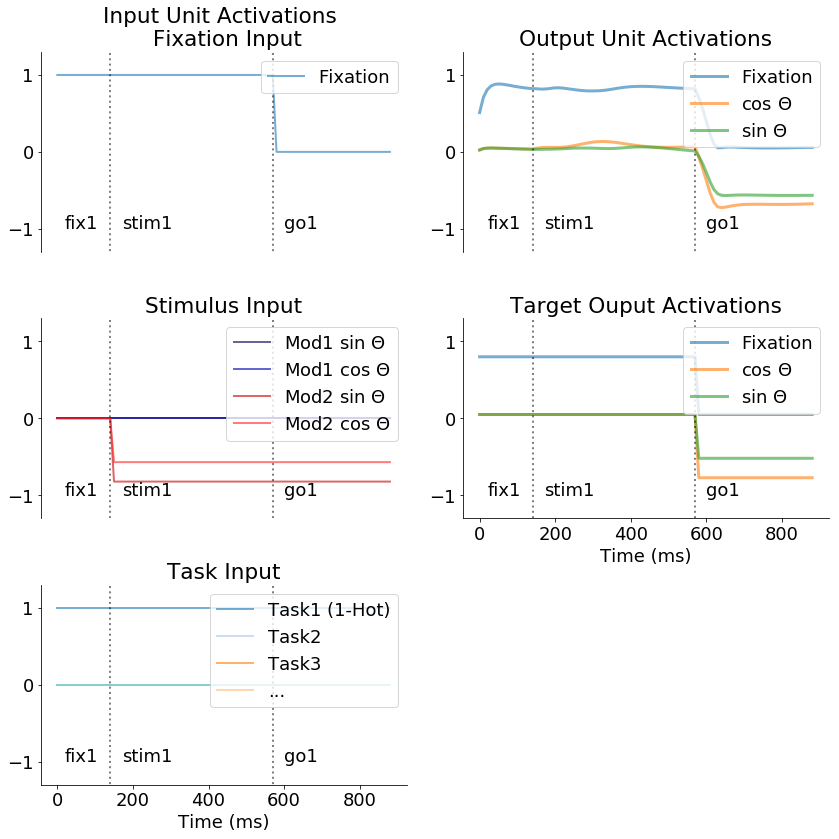

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/ckpts/model.ckpt-179000


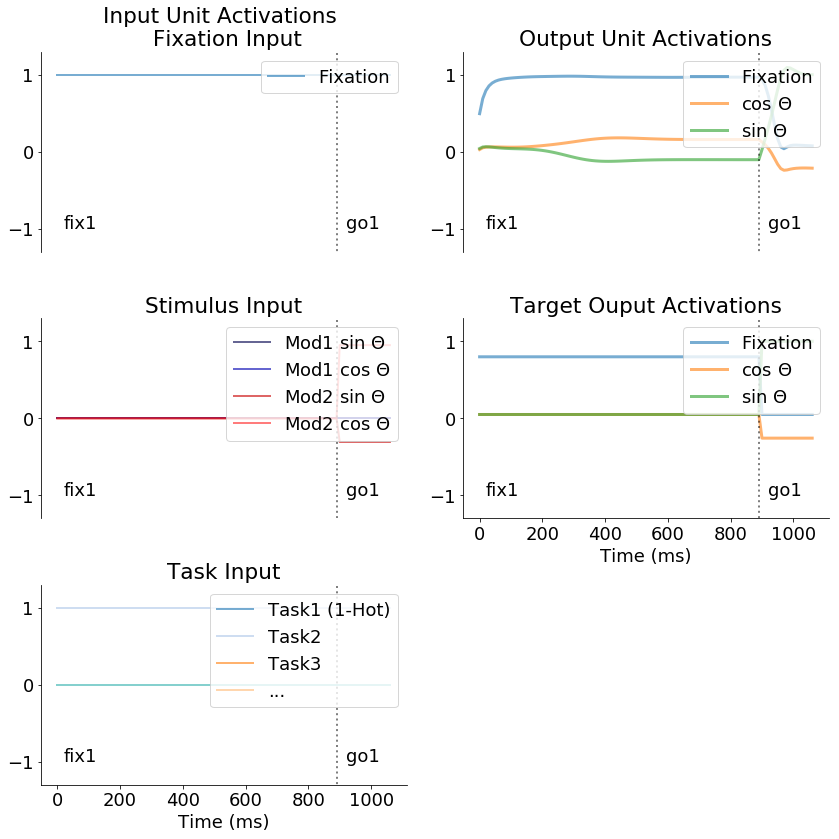

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/ckpts/model.ckpt-179000


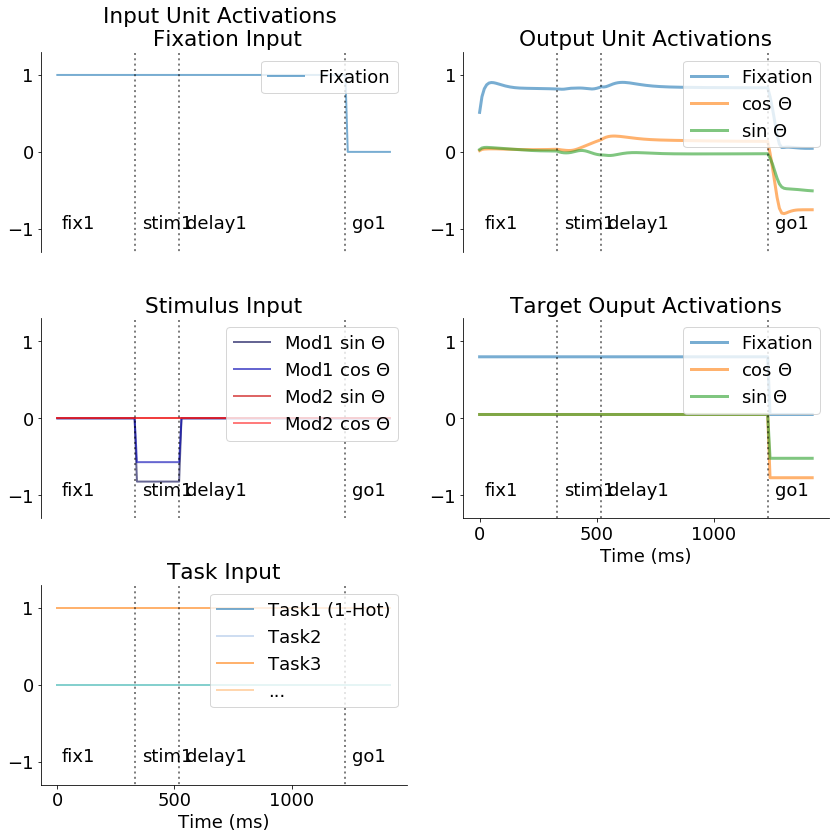

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/ckpts/model.ckpt-179000


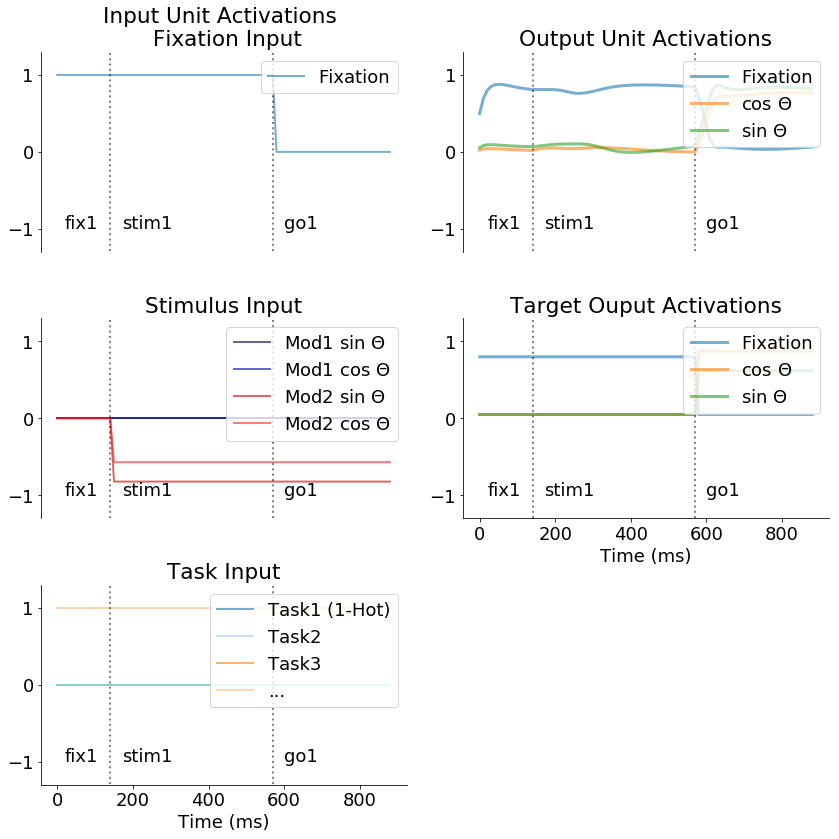

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/ckpts/model.ckpt-179000


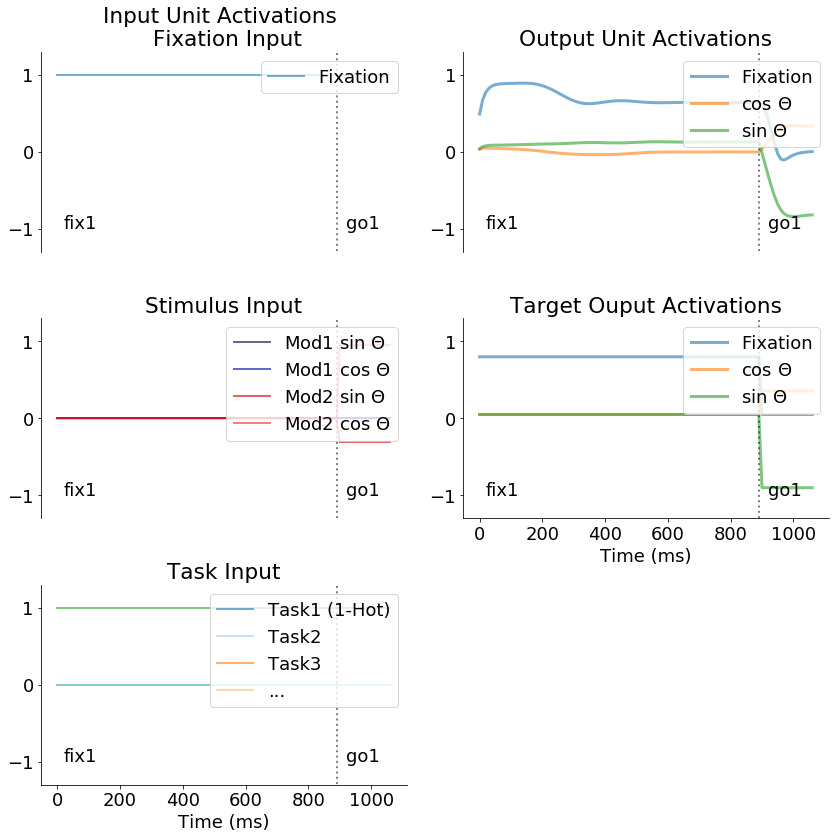

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/ckpts/model.ckpt-179000


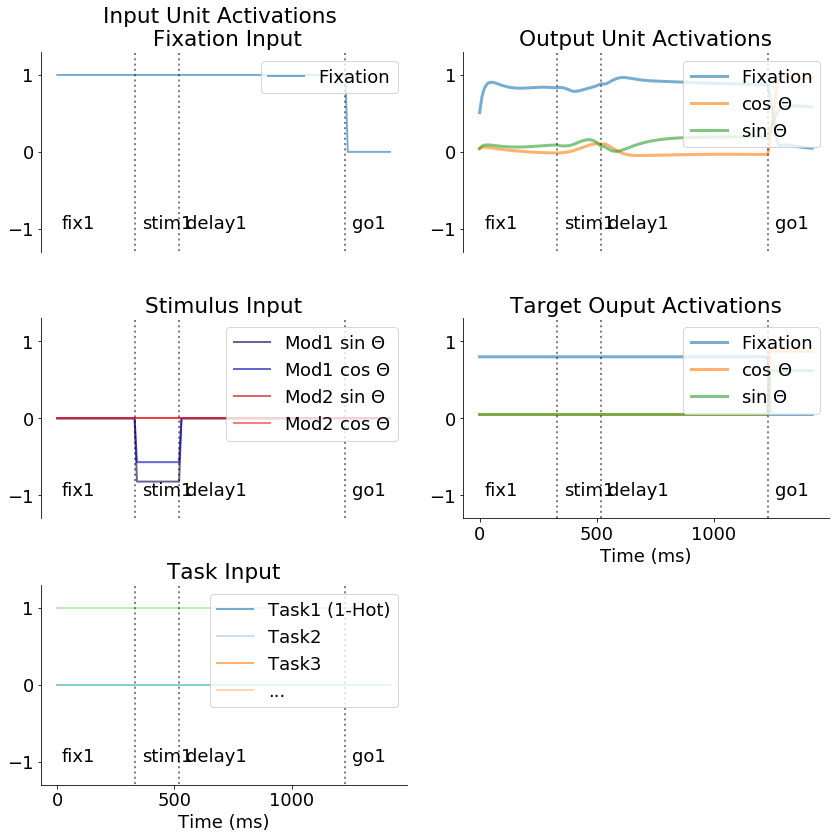

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/ckpts/model.ckpt-179000


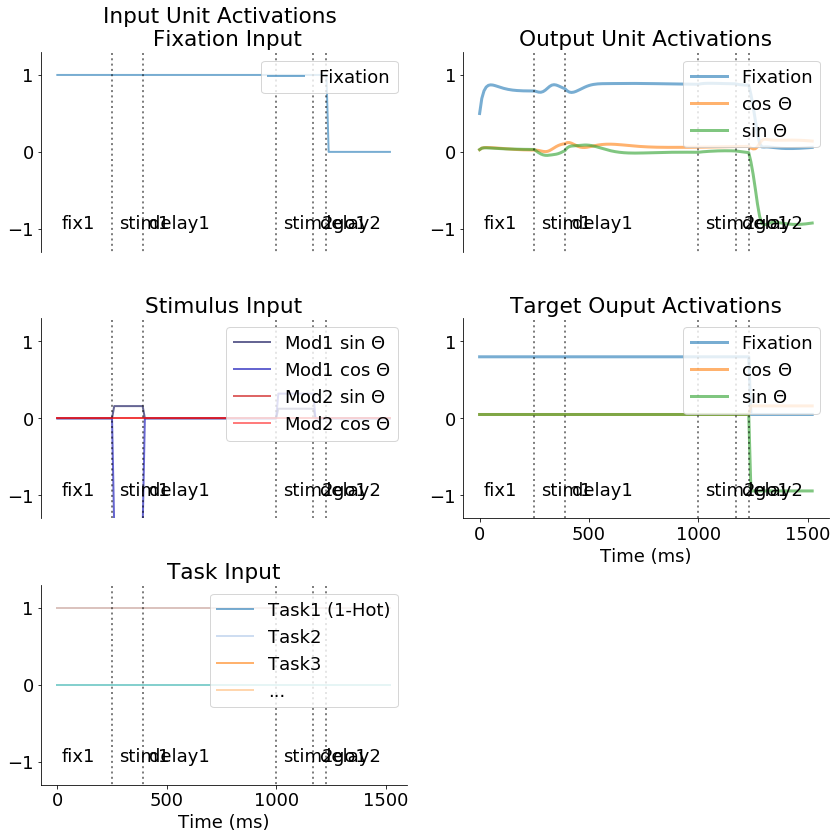

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/ckpts/model.ckpt-179000


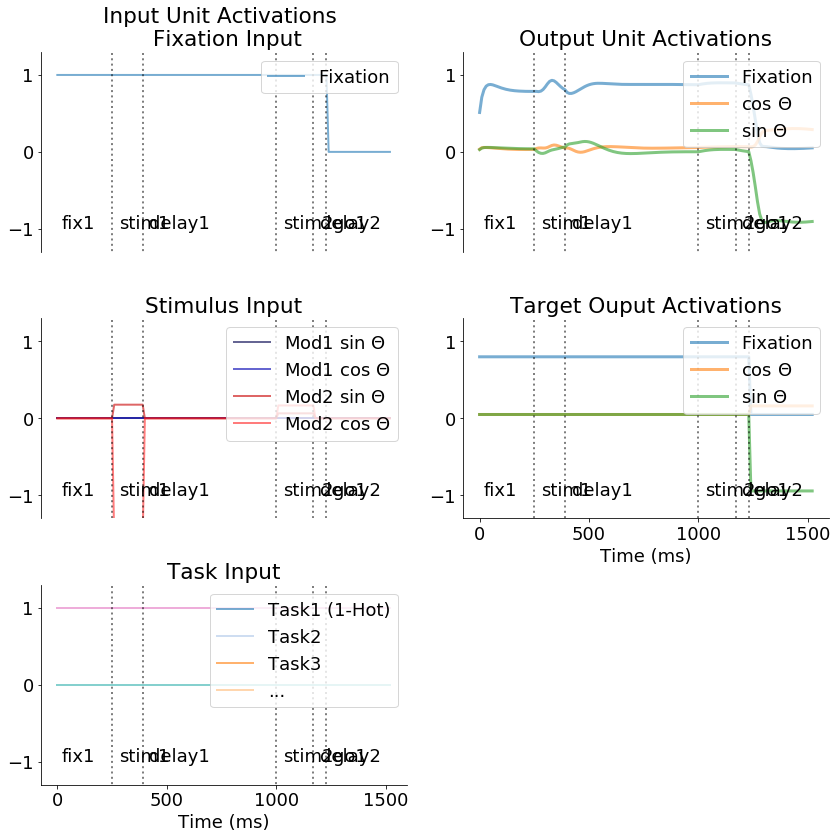

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/ckpts/model.ckpt-179000


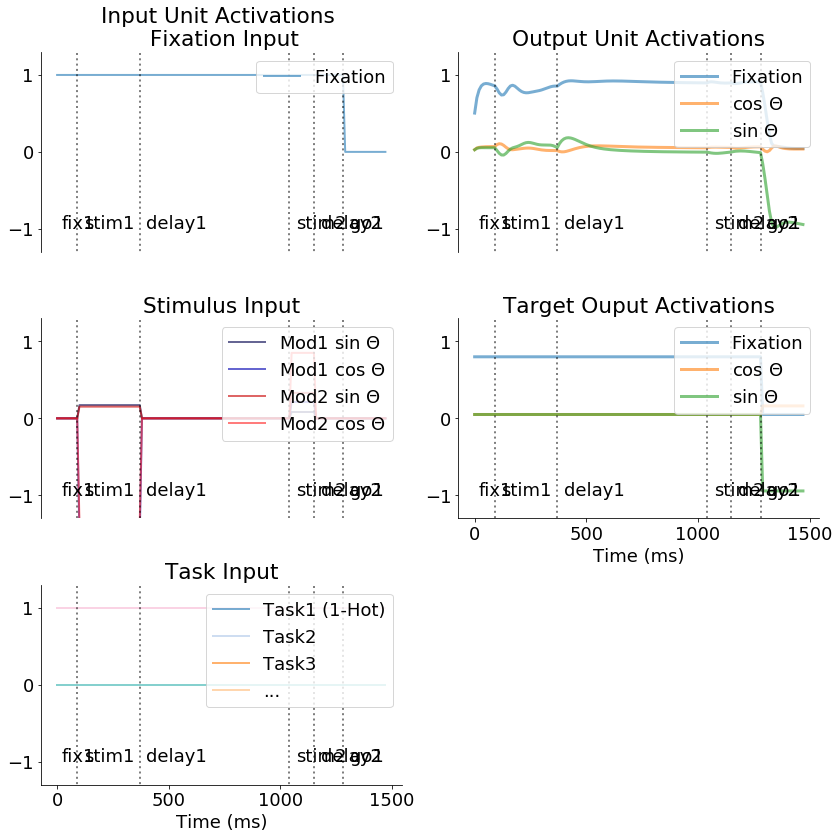

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/ckpts/model.ckpt-179000


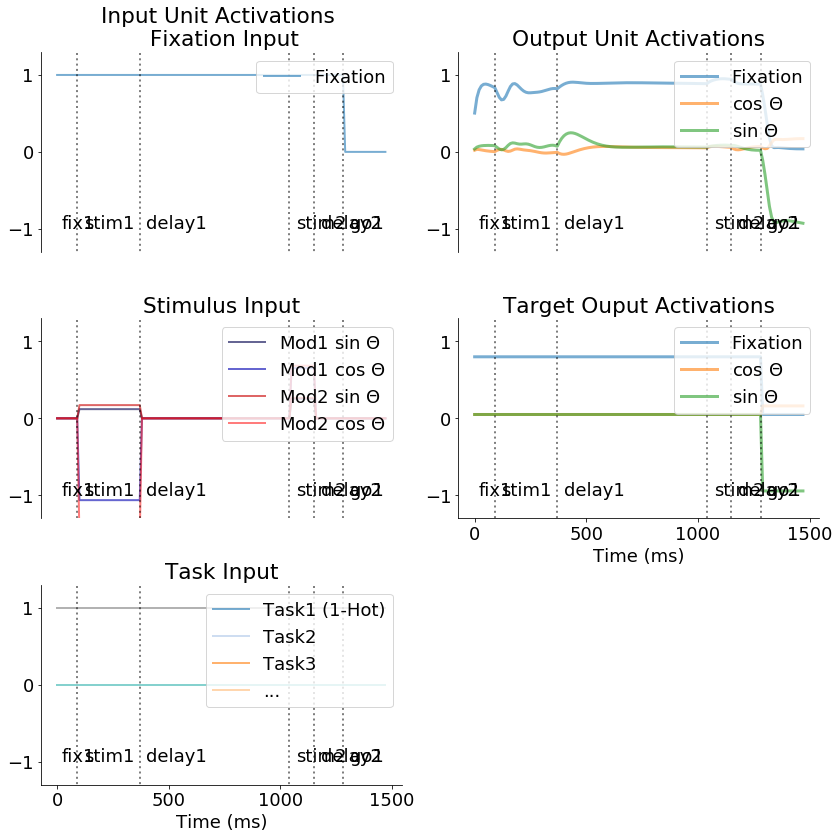

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/ckpts/model.ckpt-179000


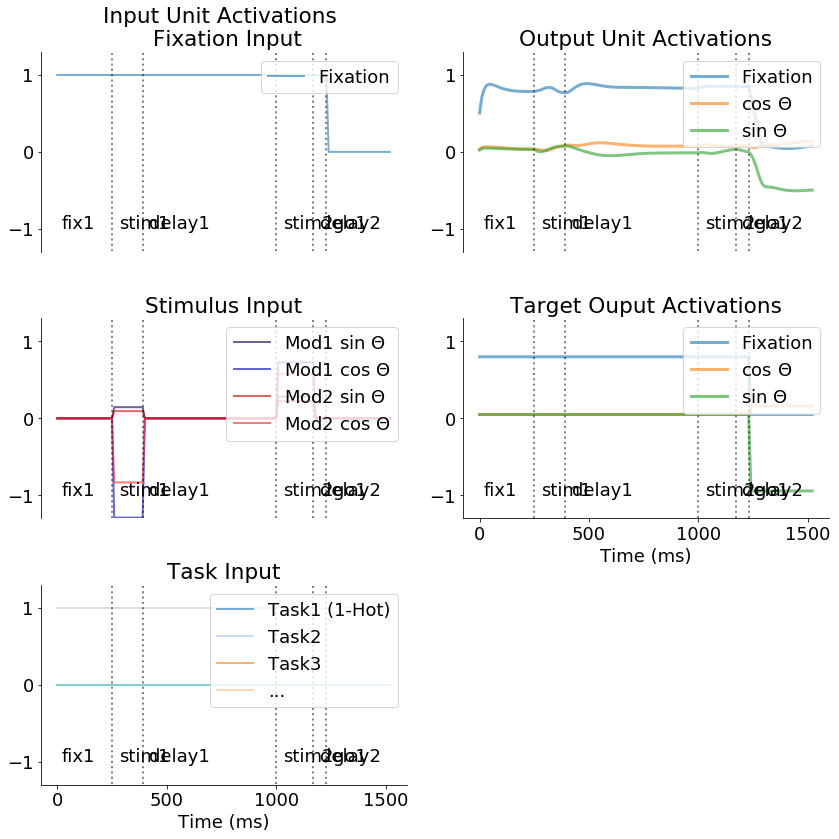

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/ckpts/model.ckpt-179000


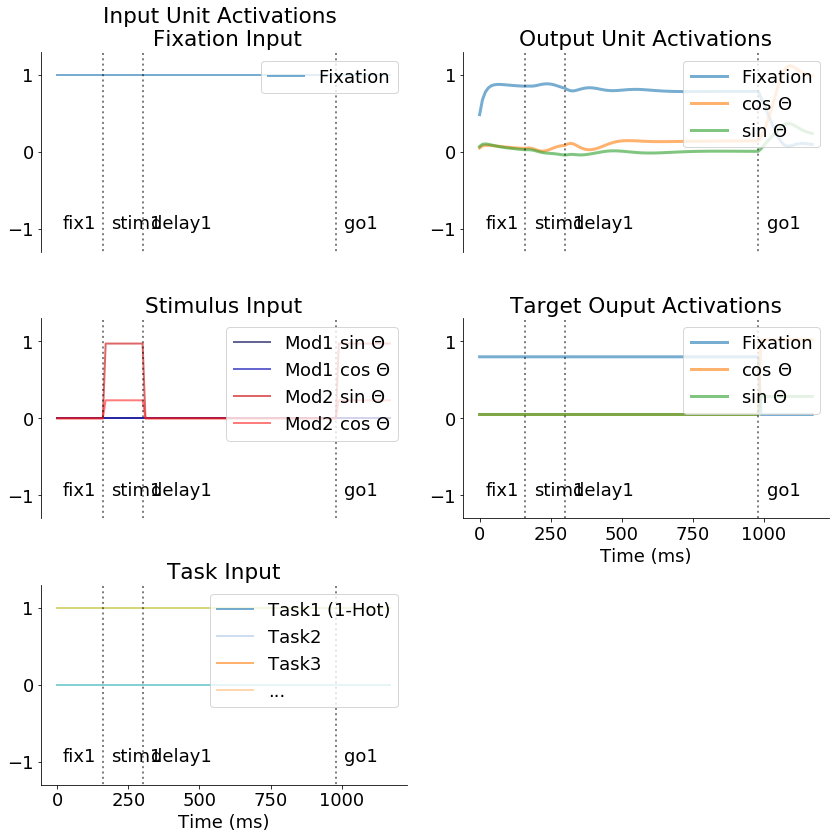

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/ckpts/model.ckpt-179000


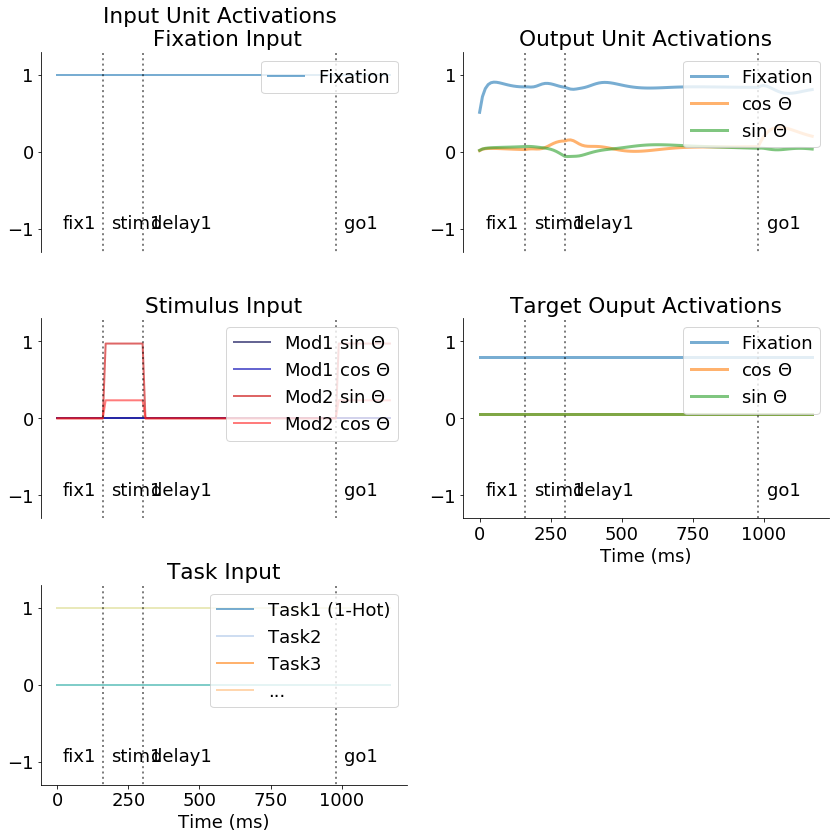

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/ckpts/model.ckpt-179000


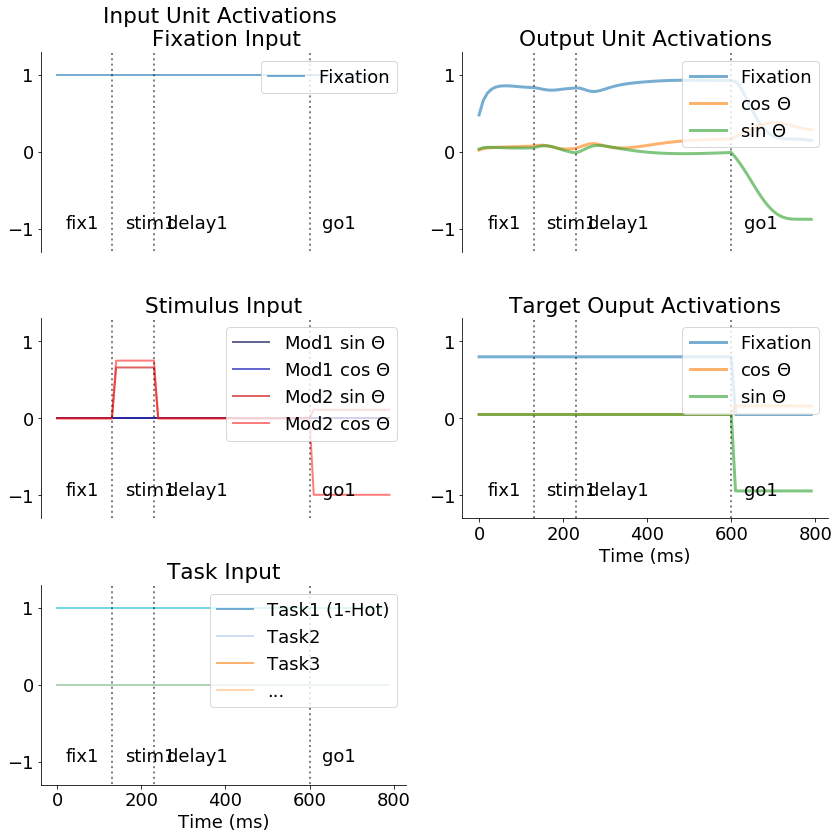

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/ckpts/model.ckpt-179000


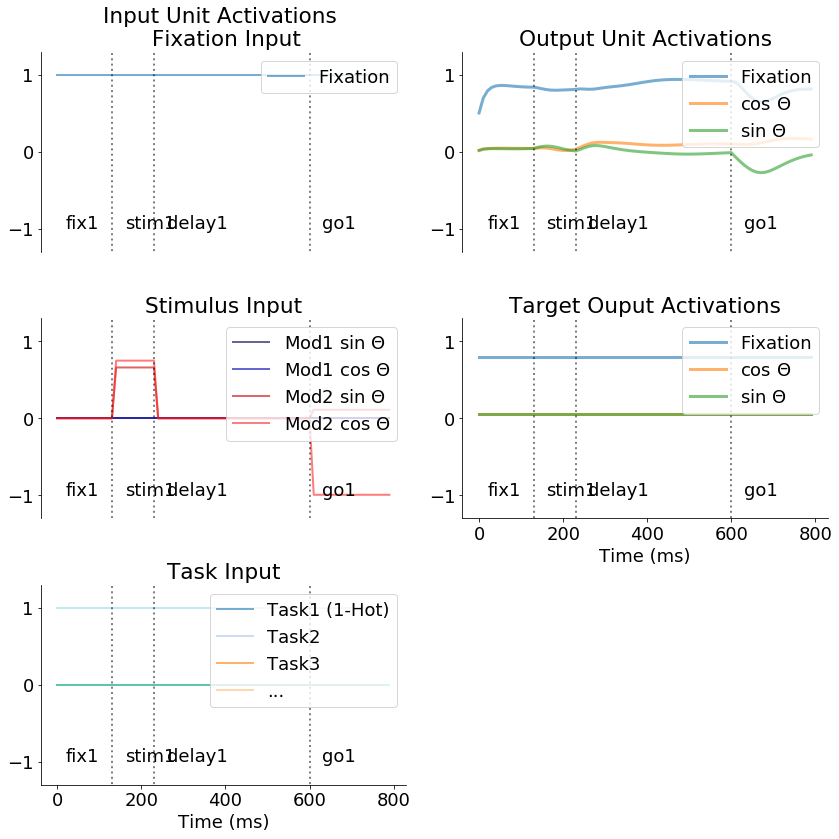

In [64]:
# cmap=plt.get_cmap('terrain')
plt.rcParams.update({'font.size': 18})
a = .6
col = 2
nr = 3
t = 0
box_anchor = [0,0]
n = False

if net is 'stepnet':
    stim_labels = ['Mod1 sin ${\Theta}$','Mod1 cos ${\Theta}$','Mod2 sin ${\Theta}$','Mod2 cos ${\Theta}$']
elif net is 'highd_inputs':
    stim_labels = ['Stim Neuron 1', 'Stim Neuron 2', 'Stim Neuron 3', 'Stim Neuron 4', 'Stim Neuron 5', '...']
    
loc = 'upper right'
        

for rule in task_list:
    h, y_hat, hparams, trial = load_X_from_model_dir(model_dir_all,rule,noise = n)
    stim_in = hparams['n_eachring']*hparams['num_ring']
    fig = plt.figure(figsize=(12, int(25/col)),tight_layout=True,facecolor='white')
    
    ax1 = plt.subplot(3,col,1)
    plt.plot(range(0,np.shape(trial.x)[0]*10,10),trial.x[:,t,0], alpha = a, linewidth = 2)
    plt.legend(('Fixation',),loc=loc)
    plt.xticks([])
    ax1.set_title('Input Unit Activations \n Fixation Input')
    ax1.spines["top"].set_visible(False)  
    ax1.spines["right"].set_visible(False) 
    ax1.spines["bottom"].set_visible(False) 
    plot_epoch_division(trial)

    ax2 = plt.subplot(3,col,col+1)
    cmap=plt.get_cmap('seismic')
    big_stim_in = stim_in+3
    c_set = np.arange(0,1,1/big_stim_in)
    c_set = np.concatenate((c_set[:int(stim_in/2)],c_set[big_stim_in:int(big_stim_in/2):-1]),axis = 0)
    for l in range(stim_in):
        plt.plot(range(0,np.shape(trial.x)[0]*10,10),trial.x[:,t,1+l], alpha = a, linewidth = 2,c = cmap(c_set[l]))#,c = cmap(c_set[l])
    plt.legend((stim_labels),loc=loc)
    plt.xticks([])
    plt.title('Stimulus Input')
    ax2.spines["top"].set_visible(False)  
    ax2.spines["right"].set_visible(False)
    ax2.spines["bottom"].set_visible(False) 
    plot_epoch_division(trial)

    #Task Set
    ax3 = plt.subplot(3,col,2*col+1)
    cmap=plt.get_cmap('tab20')
    for l in range(20):
        plt.plot(range(0,np.shape(trial.x)[0]*10,10),trial.x[:,t,stim_in+l+1], alpha = a, linewidth = 2,c = cmap(l/20))#,c = cmap(l/20)
    plt.legend(('Task1 (1-Hot)', 'Task2', 'Task3', '...'),loc=loc)
    plt.xlabel('Time (ms)')
    plt.title('Task Input')
    ax3.spines["top"].set_visible(False)  
    ax3.spines["right"].set_visible(False) 
    plot_epoch_division(trial)


    ax = plt.subplot(3,col,col)
    plt.plot(range(0,np.shape(trial.x)[0]*10,10),y_hat[:,t,:],alpha = a, linewidth = 3)
    # plt.plot(trial.y[:,t,:])
    plt.legend(('Fixation','cos ${\Theta}$','sin ${\Theta}$'),loc=loc)
    plt.title('Output Unit Activations')
    plt.xticks([])
    plt.ylim((-1.1,1.1))
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    ax.spines["bottom"].set_visible(False) 
    plot_epoch_division(trial)
    
    ax = plt.subplot(3,col,2*col)
    plt.plot(range(0,np.shape(trial.y)[0]*10,10),trial.y[:,t,:],alpha = a, linewidth = 3)
    # plt.plot(trial.y[:,t,:])
    plt.xlabel('Time (ms)')
    plt.legend(('Fixation','cos ${\Theta}$','sin ${\Theta}$'),loc=loc)
    plt.title('Target Ouput Activations')
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    plot_epoch_division(trial)

    figpath = os.path.join(model_dir_all,'task_schematic','noise_'+str(n))
    figname = rule+'.pdf'
    if not os.path.exists(figpath):
        os.makedirs(figpath)
    plt.savefig(os.path.join(figpath,figname))
    plt.show()

In [76]:
model_n = 0
if net is 'stepnet':
    dir_specific_all = 'crystals/softplus/l2w0001'#'crystals/softplus/l2h00001'#'stepnet/crystals/softplus/'#grad_norm_both/'#'lowD/combos'#'stepnet/lowD/tanh'#'lowD/grad_norm_l2001' #' #'lowD/armnet_noreg'#lowD/combos' ##grad_norm_l2h000001' /Documents/data/rnn/multitask/varGo/lowD/most/
elif net is 'highd_inputs':
    dir_specific_all = 'crystals/highd_inputs/all_rules_4/softplus/no_reg_tune_width'#'crystals/softplus/l2h00001'#'stepnet/crystals/softplus/'#grad_norm_both/'#'lowD/combos'#'stepnet/lowD/tanh'#'lowD/grad_norm_l2001' #' #'lowD/armnet_noreg'#lowD/combos' ##grad_norm_l2h000001' /Documents/data/rnn/multitask/varGo/lowD/most/
#     dir_specific_all = 'crystals/highd_inputs/all_rules_32/softplus/l2h00001_l2w0001'#'crystals/softplus/l2h00001'#'stepnet/crystals/softplus/'#grad_norm_both/'#'lowD/combos'#'stepnet/lowD/tanh'#'lowD/grad_norm_l2001' #' #'lowD/armnet_noreg'#lowD/combos' ##grad_norm_l2h000001' /Documents/data/rnn/multitask/varGo/lowD/most/
elif net is 'armnet':
    dir_specific_all = 'lowD/armnet_noreg/most/'#'crystals/softplus/l2h00001'#'stepnet/crystals/softplus/'#grad_norm_both/'#'lowD/combos'#'stepnet/lowD/tanh'#'lowD/grad_norm_l2001' #' #'lowD/armnet_noreg'#lowD/combos' ##grad_norm_l2h000001' /Documents/data/rnn/multitask/varGo/lowD/most/

rule = 'contextdelaydm1'
noise_on = False
model = Model(model_dir_all)
with tf.Session() as sess:
    model.saver.restore(sess,ckpt_n_dir)
    # get all connection weights and biases as tensorflow variables
    var_list = model.var_list
    # evaluate the parameters after training
    params = [sess.run(var) for var in var_list]
    # get hparams
    hparams = model.hp
    trial_master = generate_trials(rule, hparams, mode = 'random', batch_size = 200, noise_on=noise_on, delay_fac =1)   

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1196000


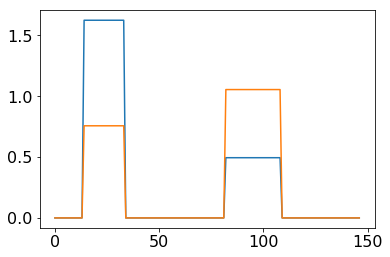

In [93]:
trial_x = trial_master.x[:,14,:]
plt.plot(np.sqrt(trial_x[:,1]**2+trial_x[:,2]**2))
plt.plot(np.sqrt(trial_x[:,3]**2+trial_x[:,4]**2))
plt.show()

In [88]:
trial_master.stim_locs[trial_ind,:]

array([4.6640195 , 0.76068635, 4.6640195 , 0.76068635])

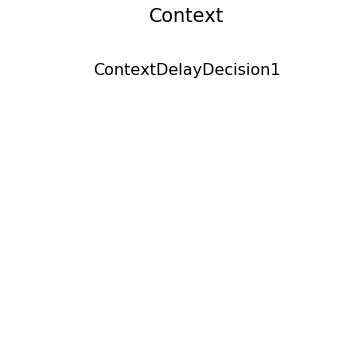

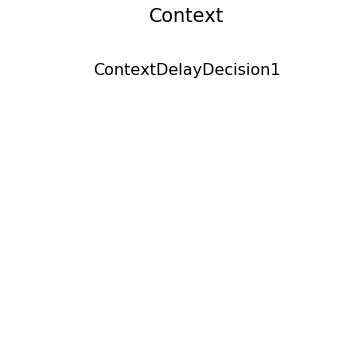

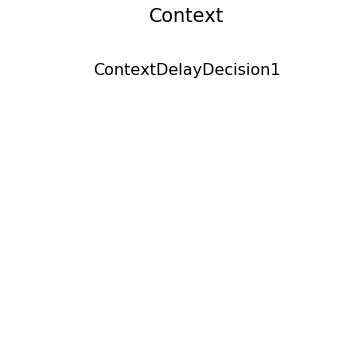

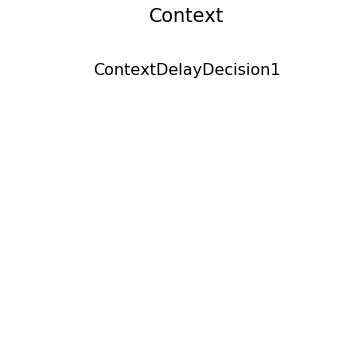

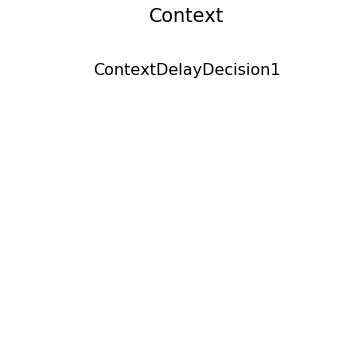

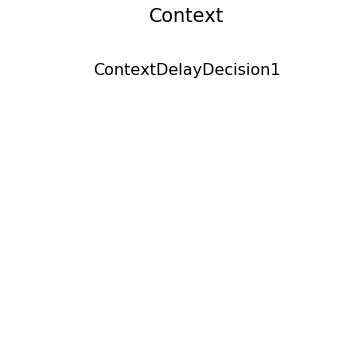

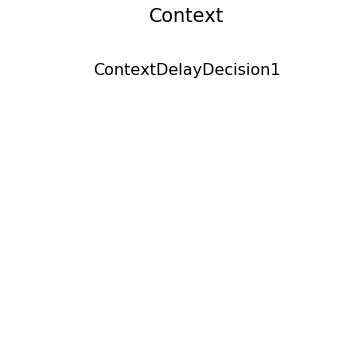

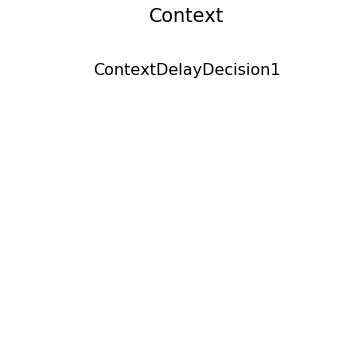

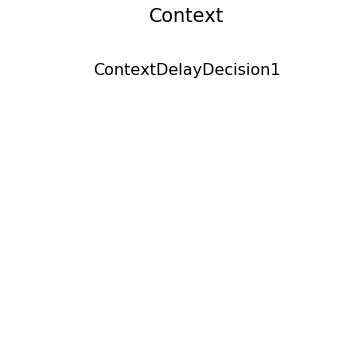

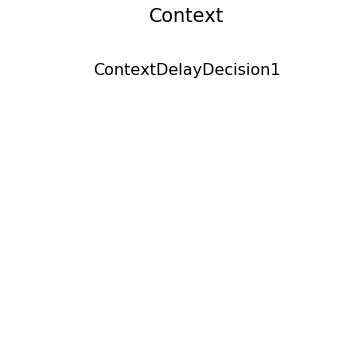

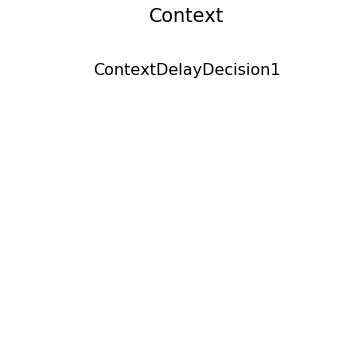

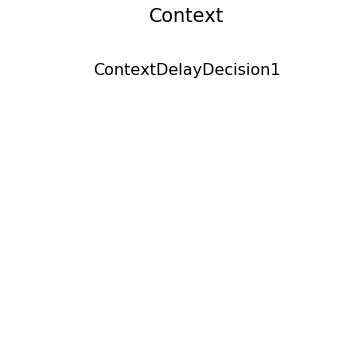

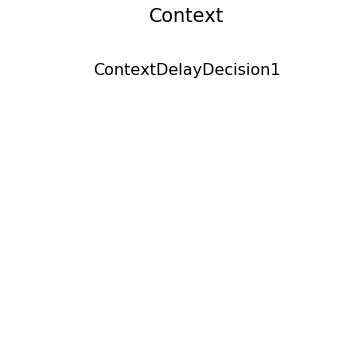

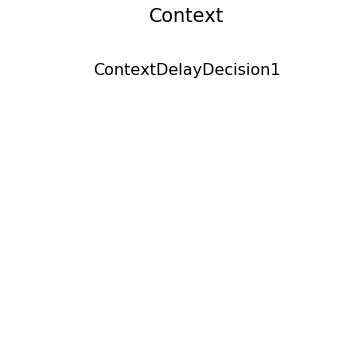

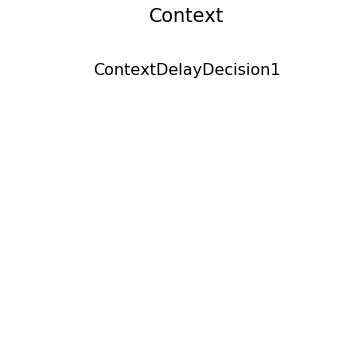

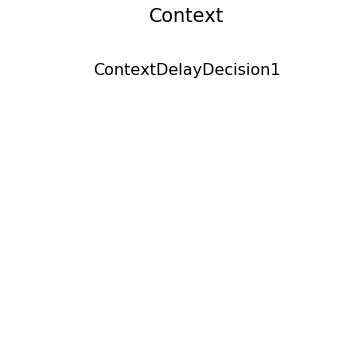

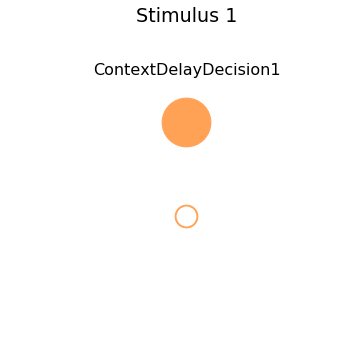

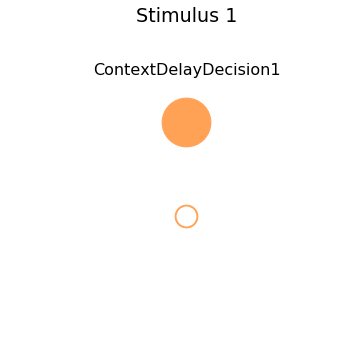

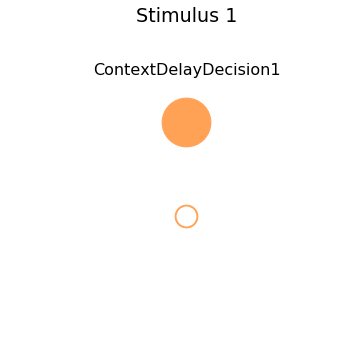

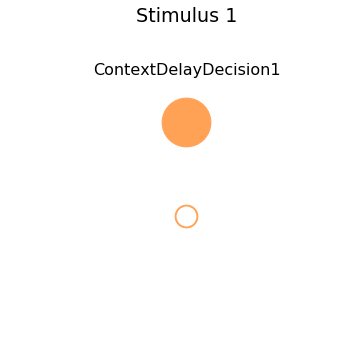

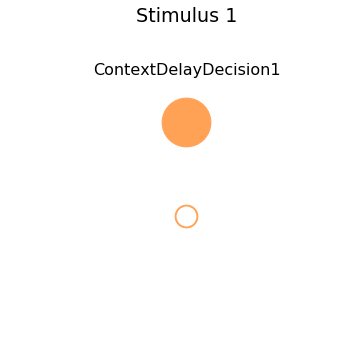

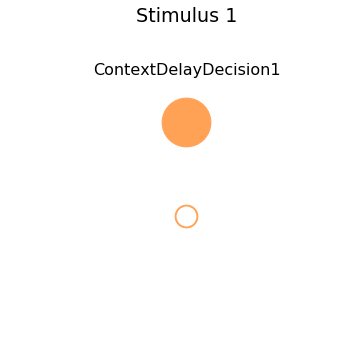

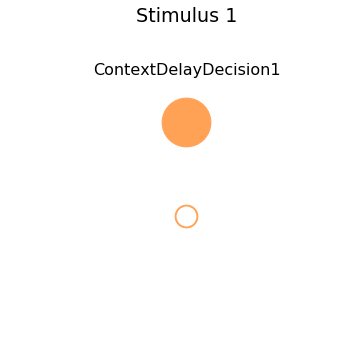

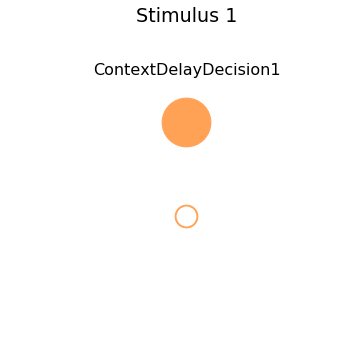

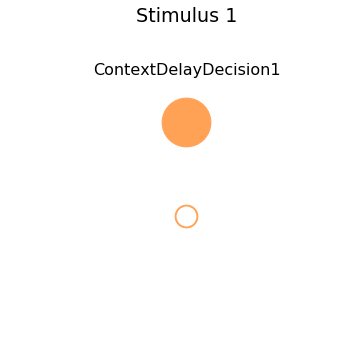

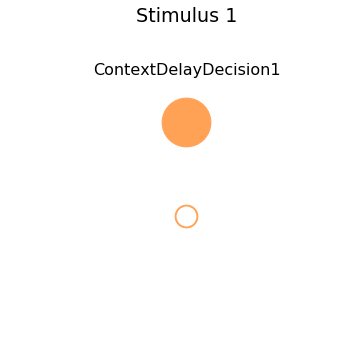

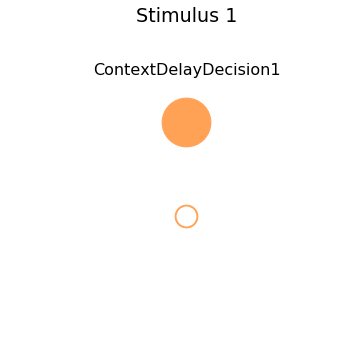

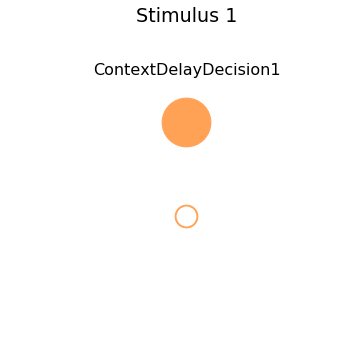

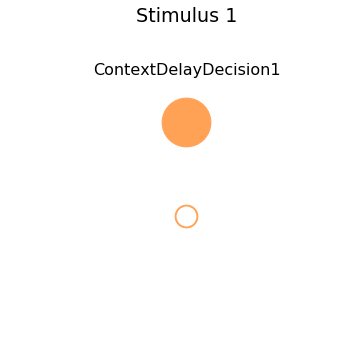

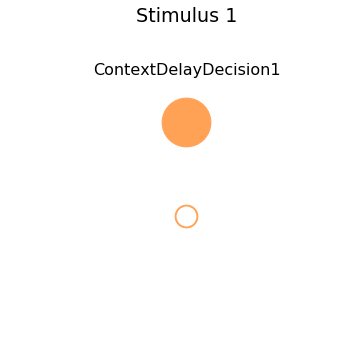

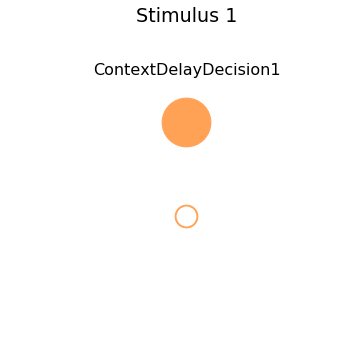

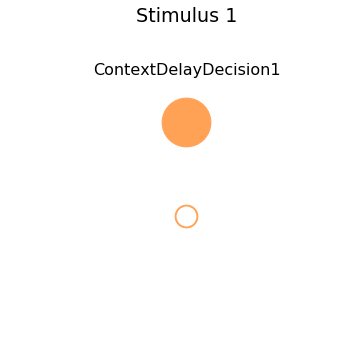

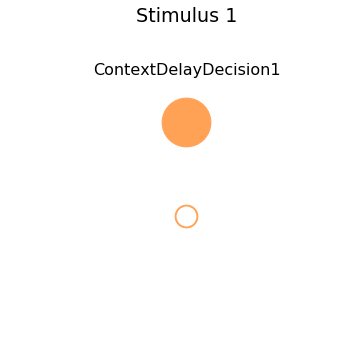

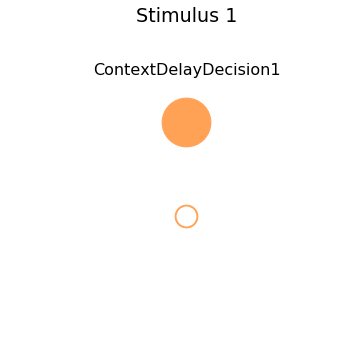

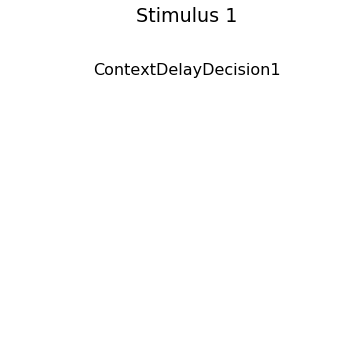

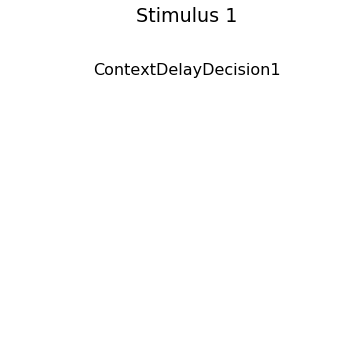

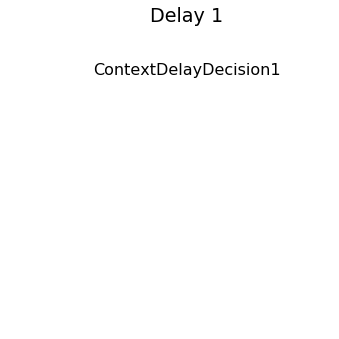

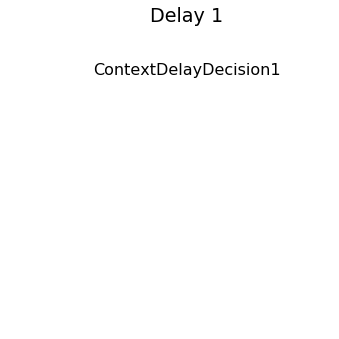

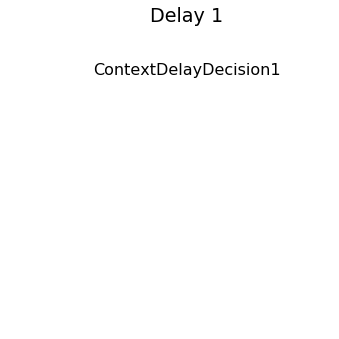

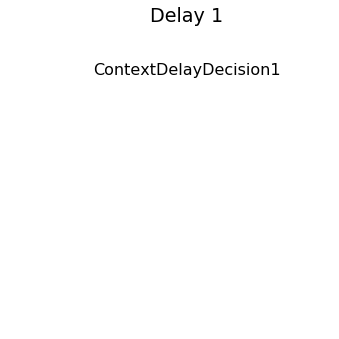

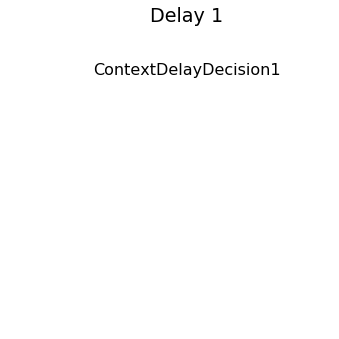

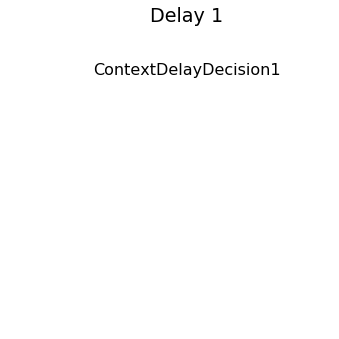

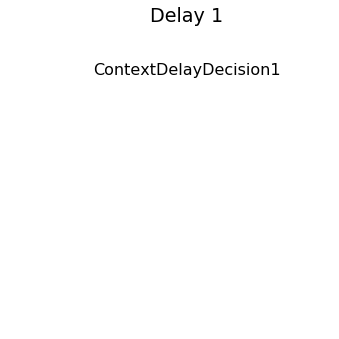

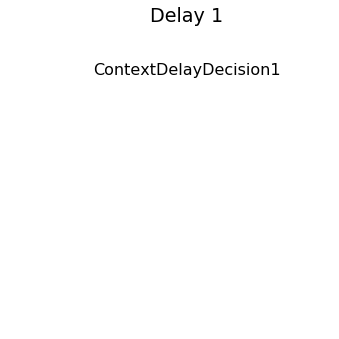

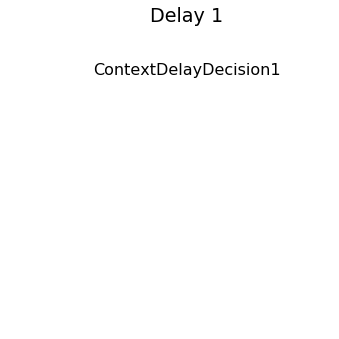

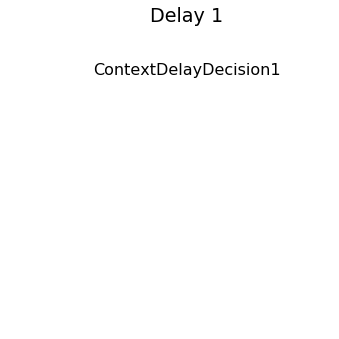

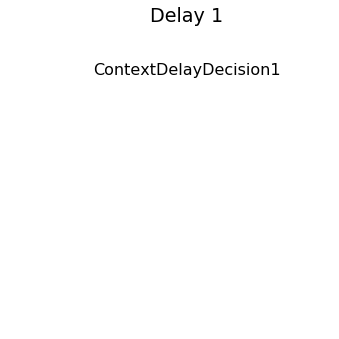

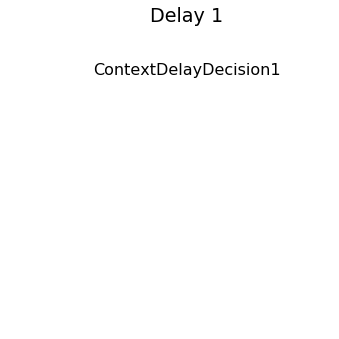

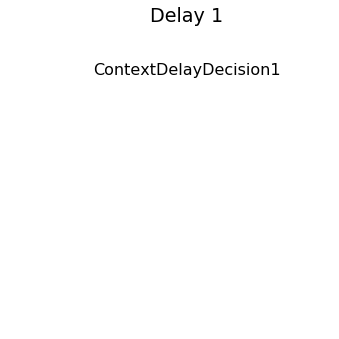

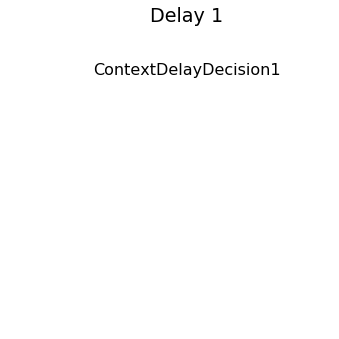

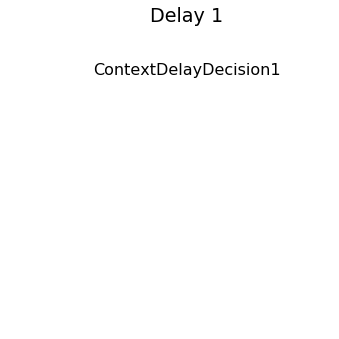

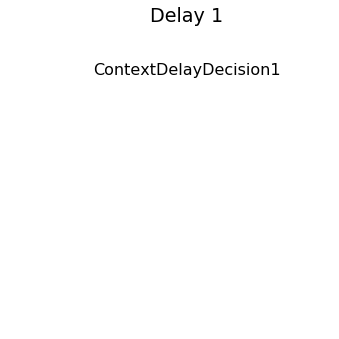

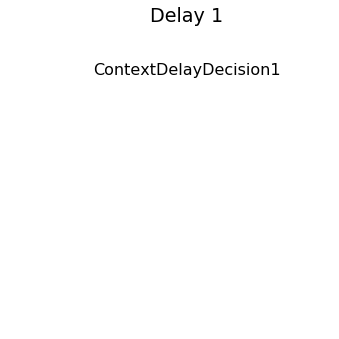

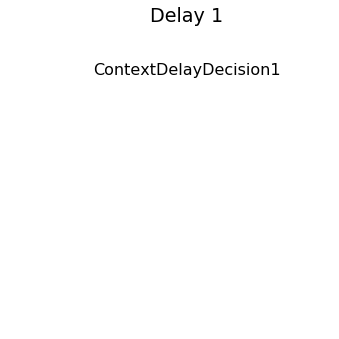

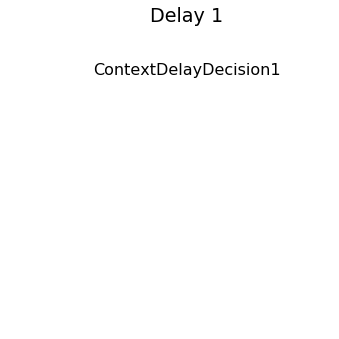

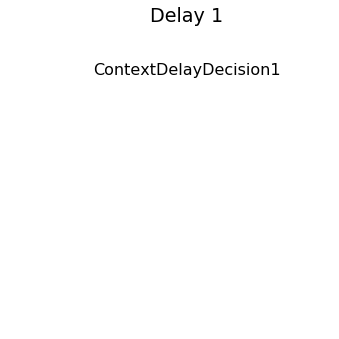

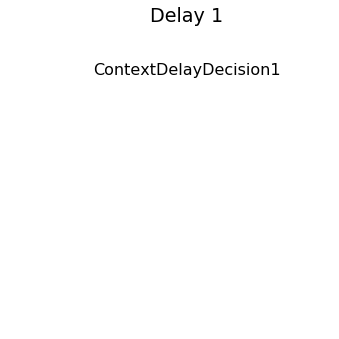

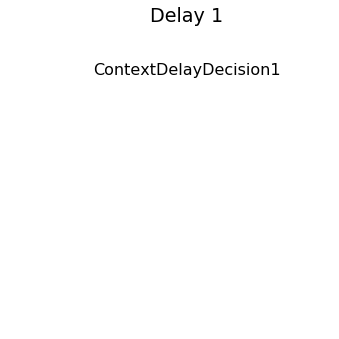

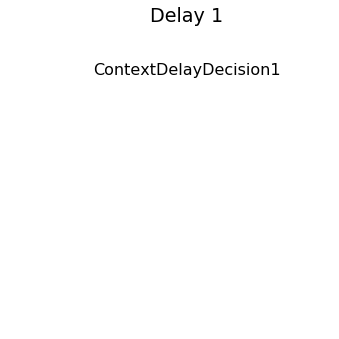

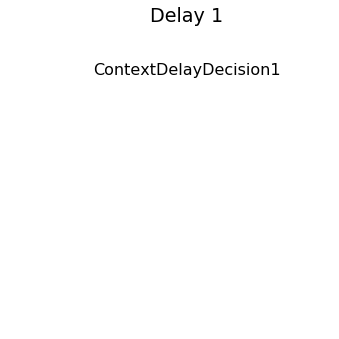

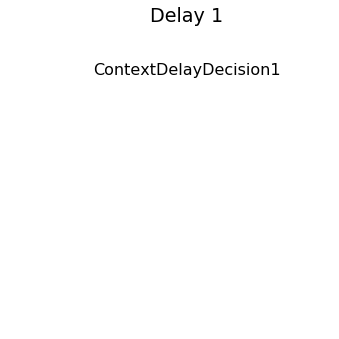

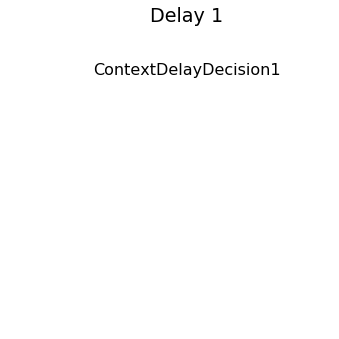

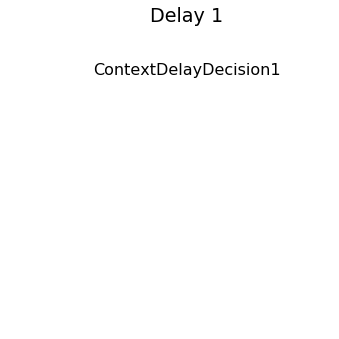

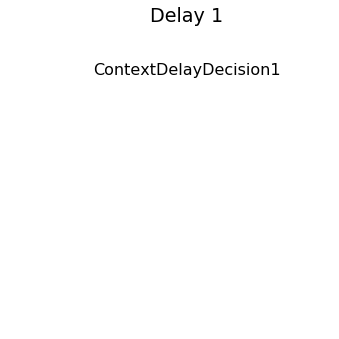

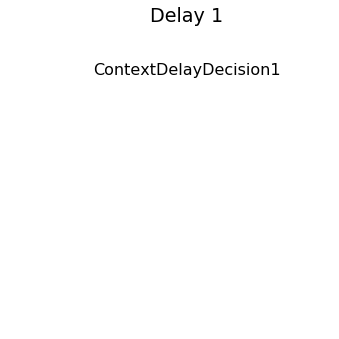

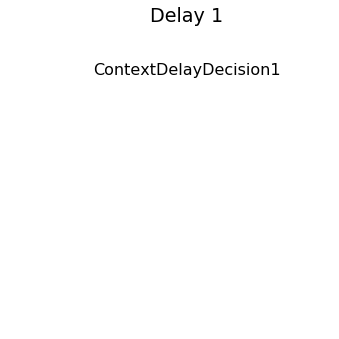

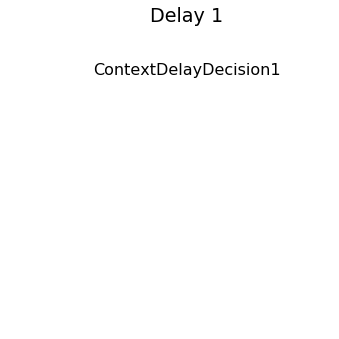

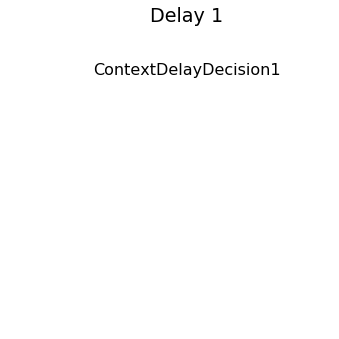

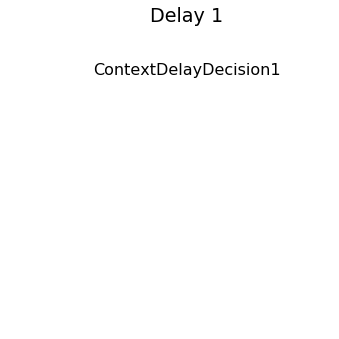

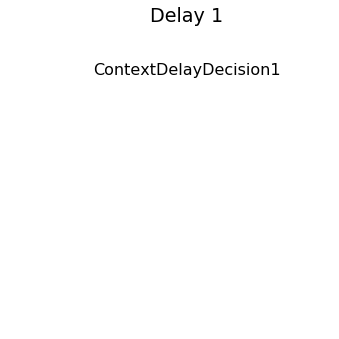

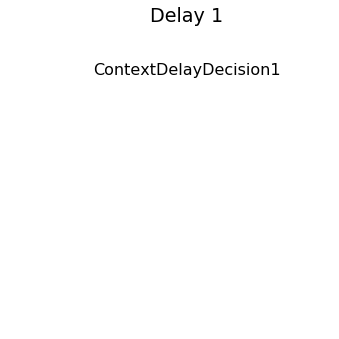

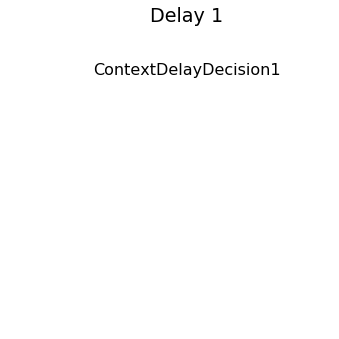

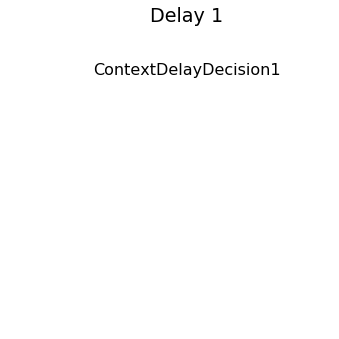

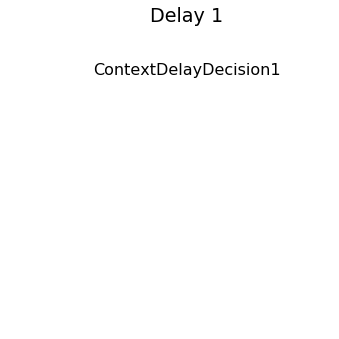

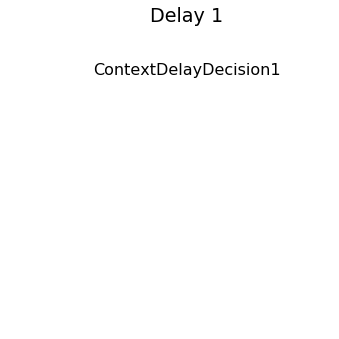

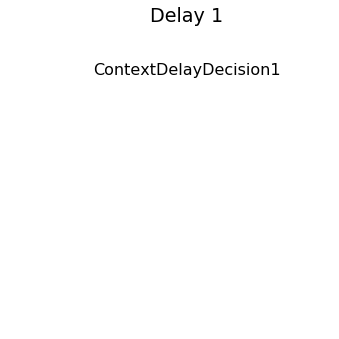

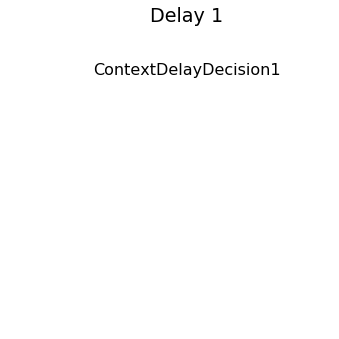

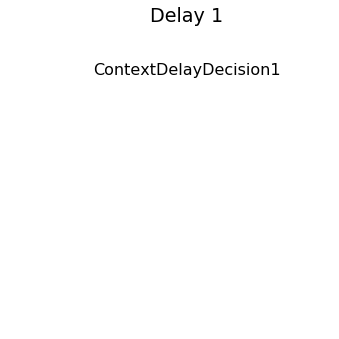

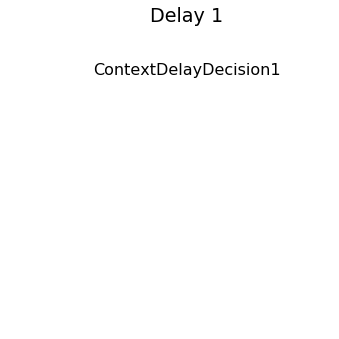

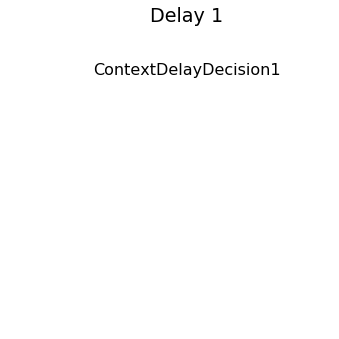

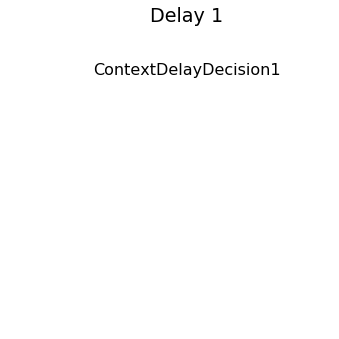

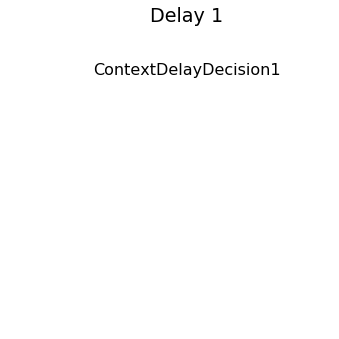

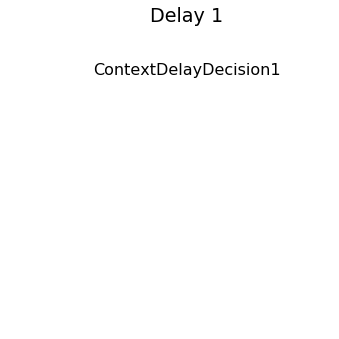

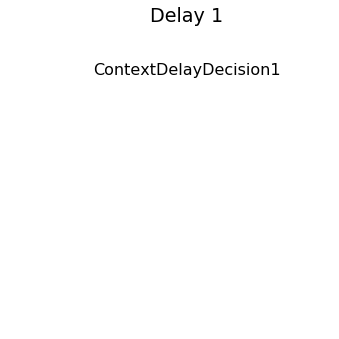

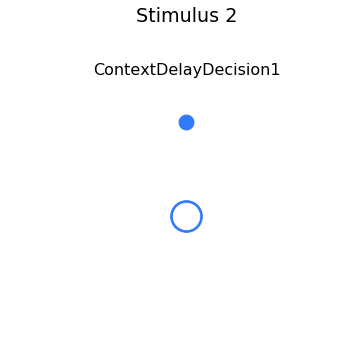

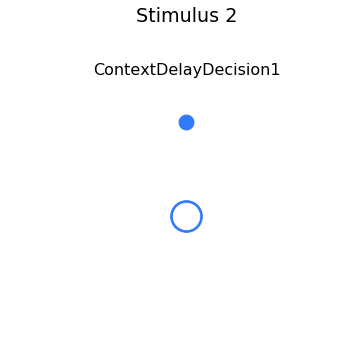

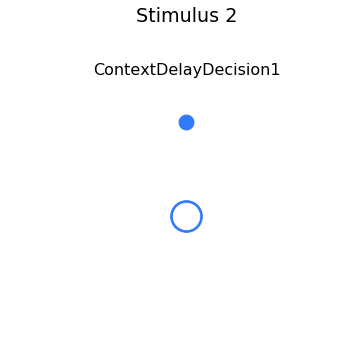

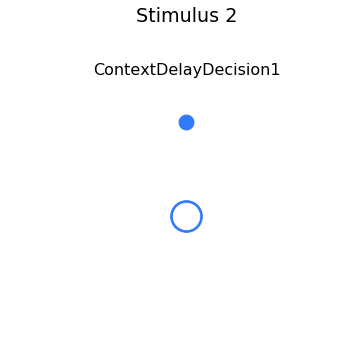

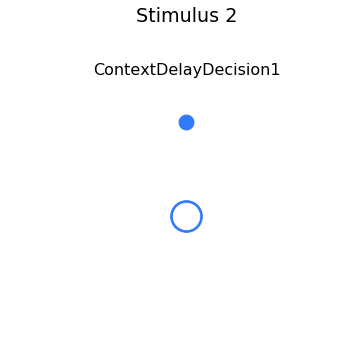

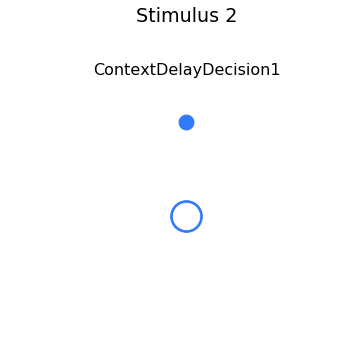

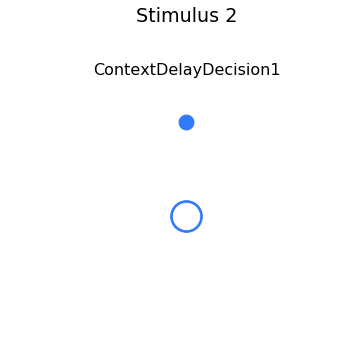

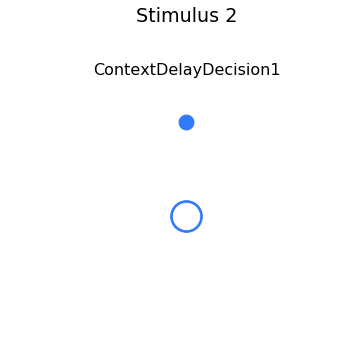

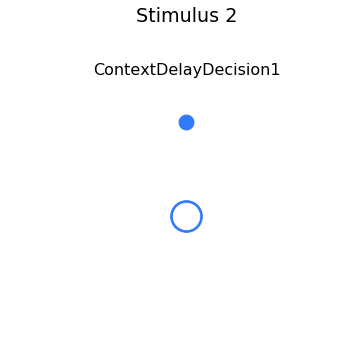

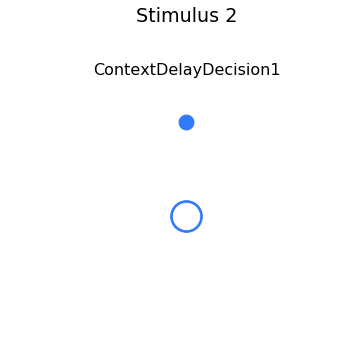

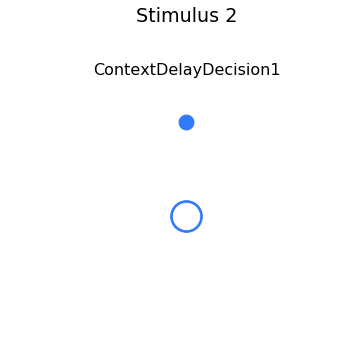

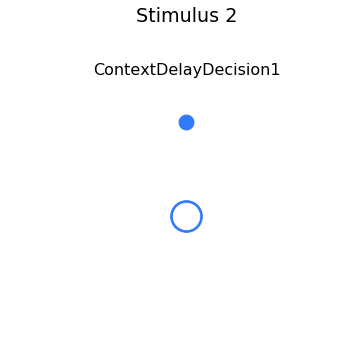

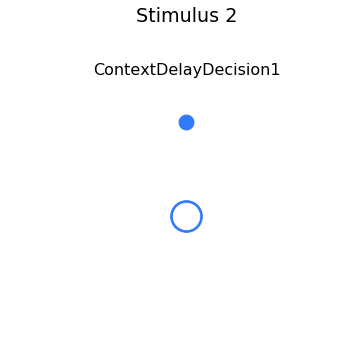

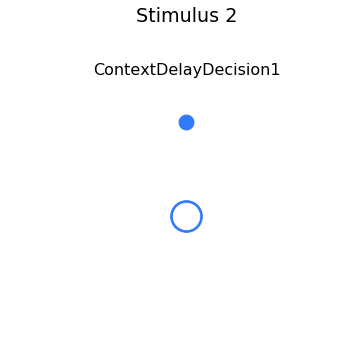

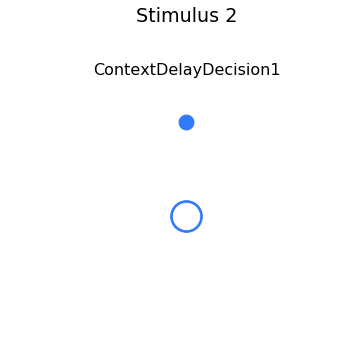

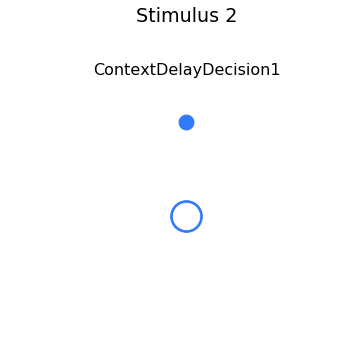

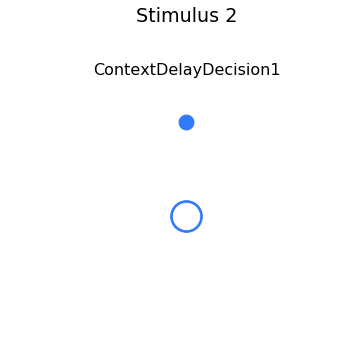

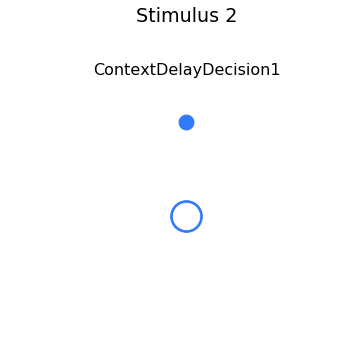

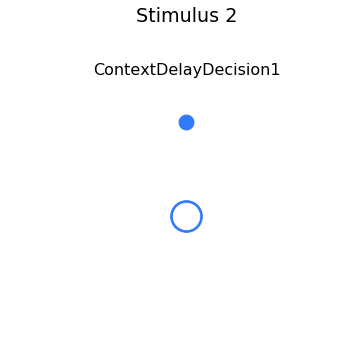

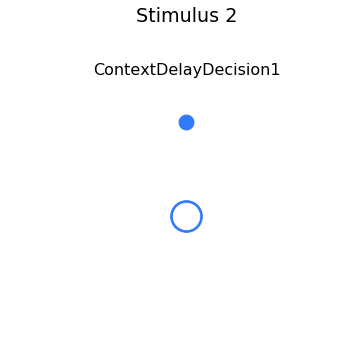

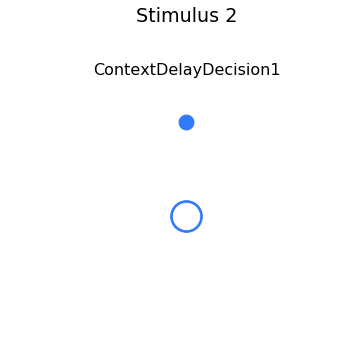

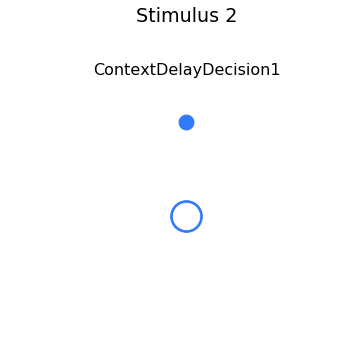

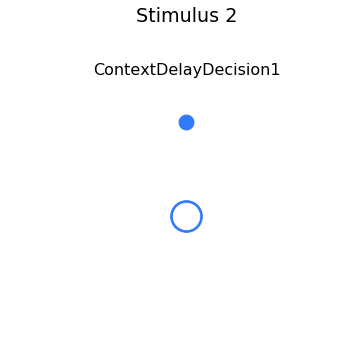

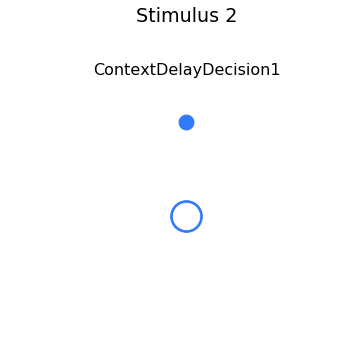

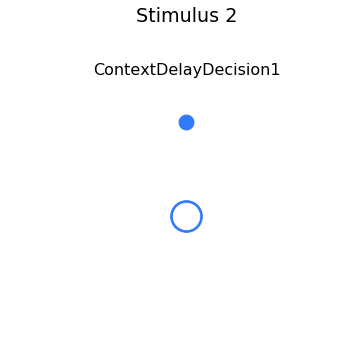

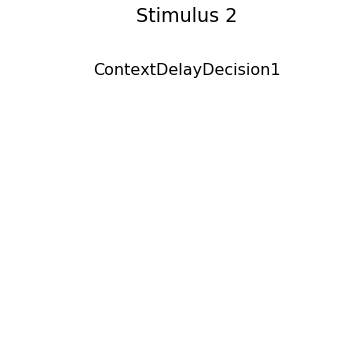

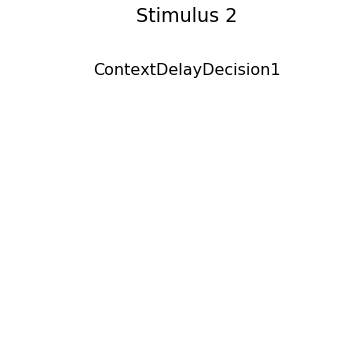

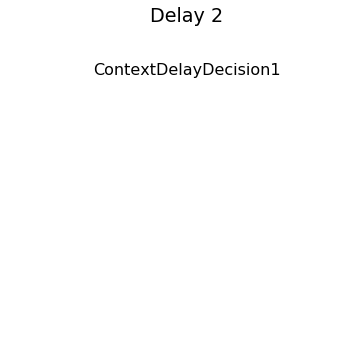

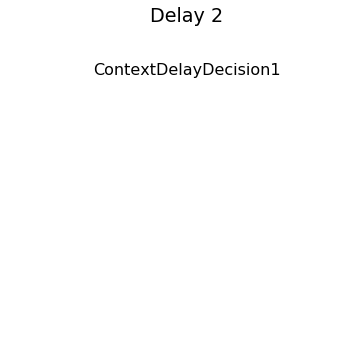

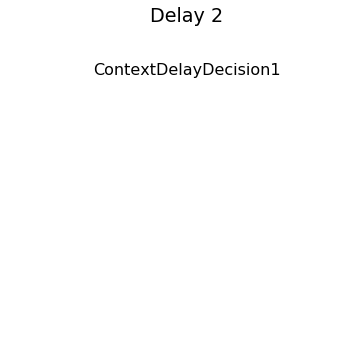

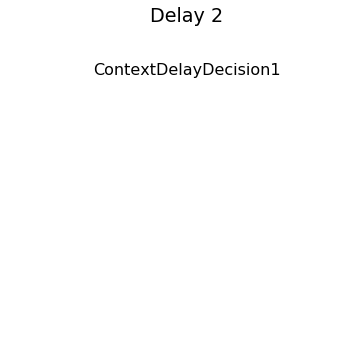

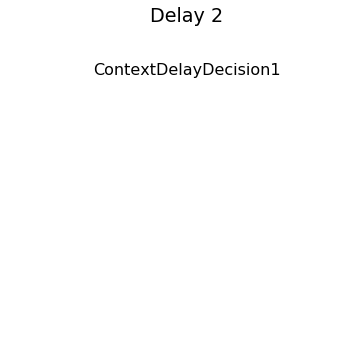

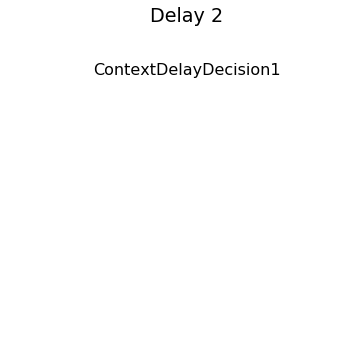

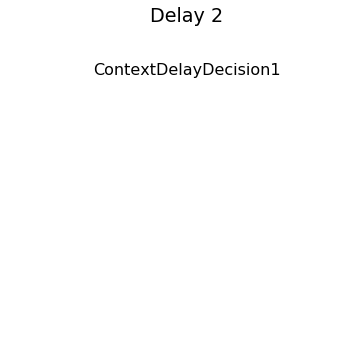

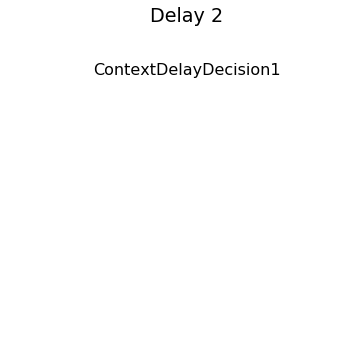

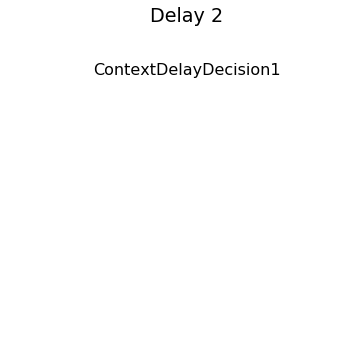

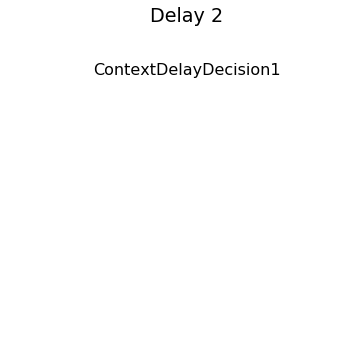

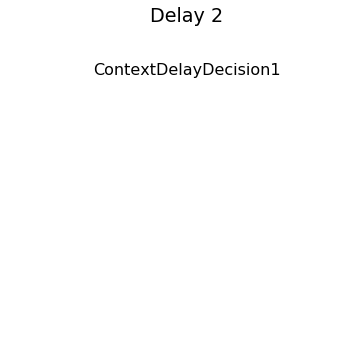

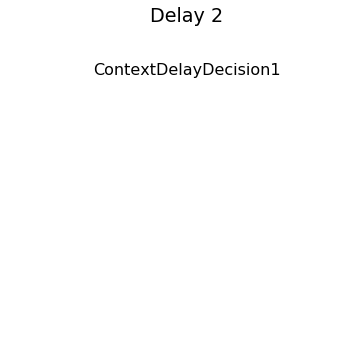

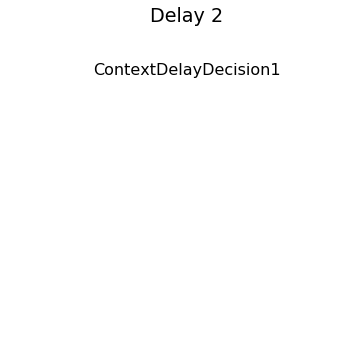

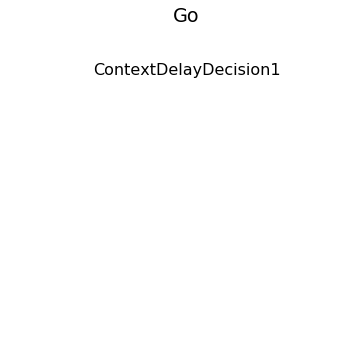

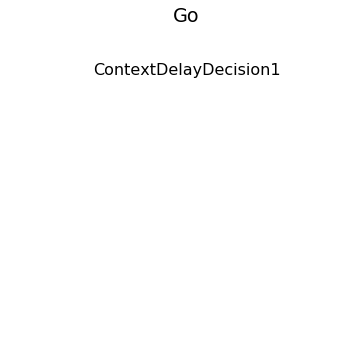

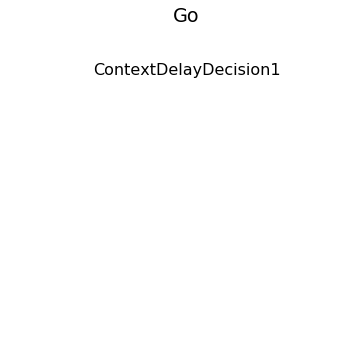

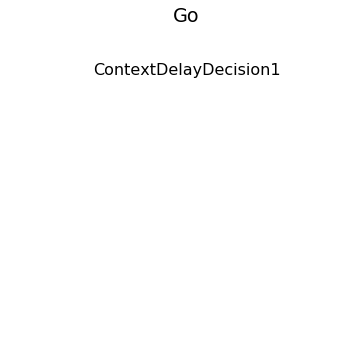

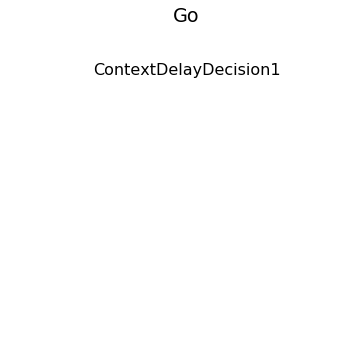

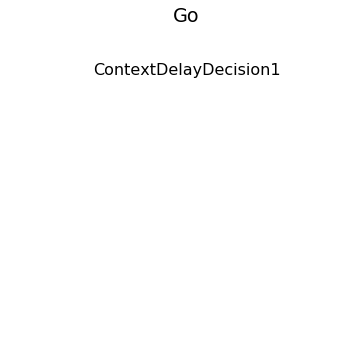

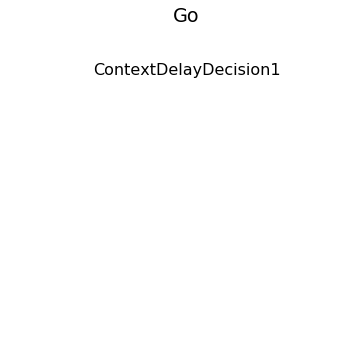

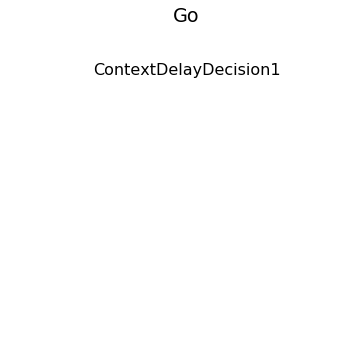

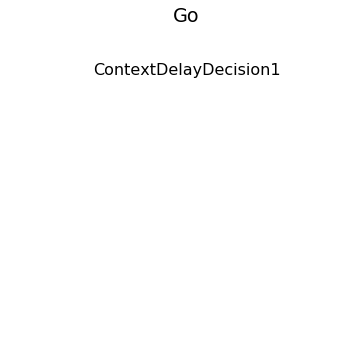

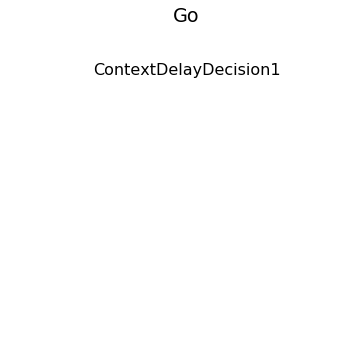

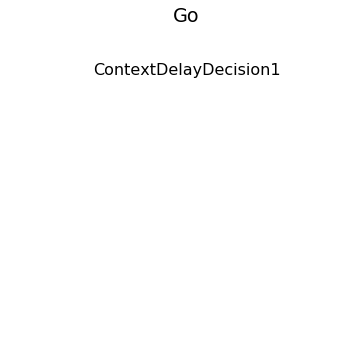

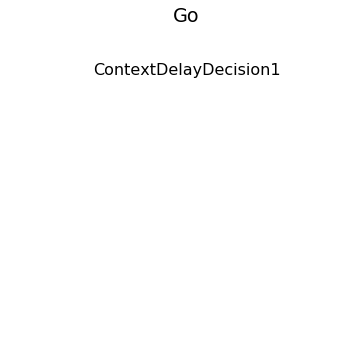

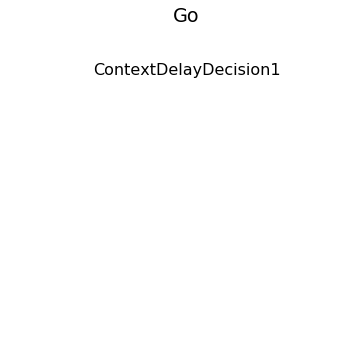

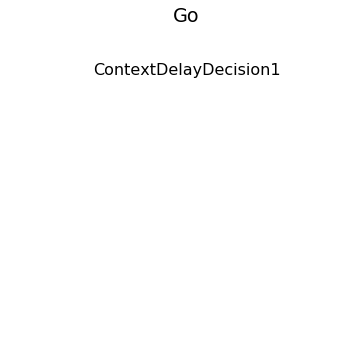

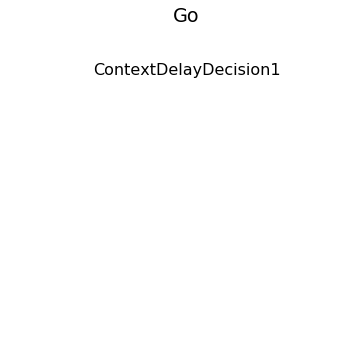

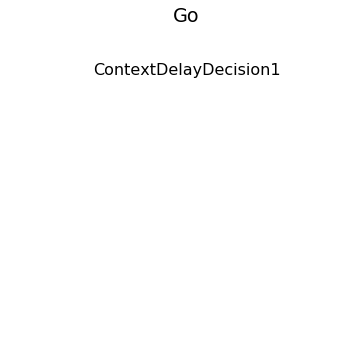

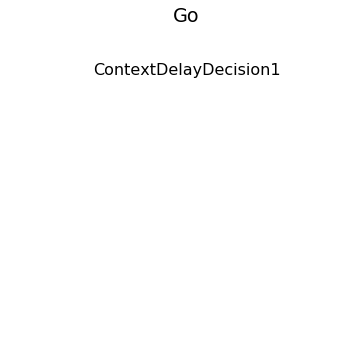

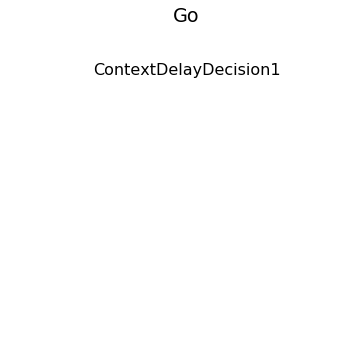

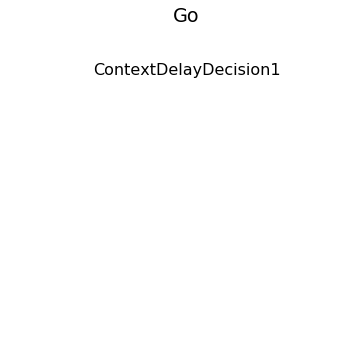

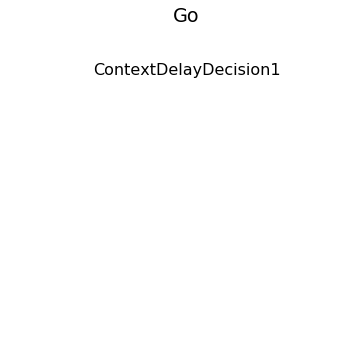

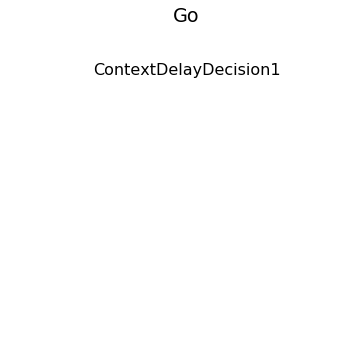

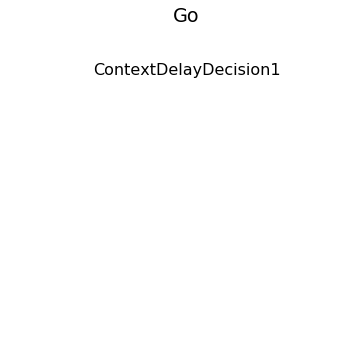

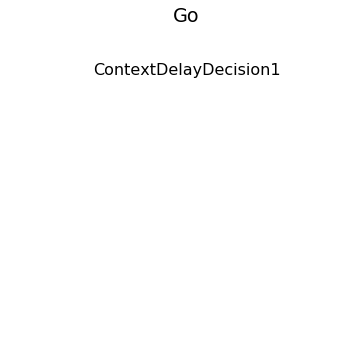

In [96]:
trial_ind = 14
task_name = 'ContextDelayDecision1'

movie_dir = os.path.join(model_dir_all,'lowDin schematic/',task_name)
if not os.path.exists(movie_dir):
    os.makedirs(movie_dir)
    
trial_x = trial_master.x[:,trial_ind,:]
y_trial_subset = trial_master.y[:,trial_ind,1:]
T,N = np.shape(trial_x)

stim1_locs_mod1 = cmap(trial_master.stim_locs[trial_ind,0]/(np.pi*2))
stim2_locs_mod1 = cmap(trial_master.stim_locs[trial_ind,1]/(np.pi*2))
stim1_locs_mod2 = cmap(trial_master.stim_locs[trial_ind,2]/(np.pi*2))
stim2_locs_mod2 = cmap(trial_master.stim_locs[trial_ind,3]/(np.pi*2))
cmap=plt.get_cmap('rainbow')

for t in range(0,T):
    fig = plt.figure(figsize=(5, 5),tight_layout=True,facecolor='white')
    plt.rcParams.update({'font.size': 16})
    
    plt.title('Context')
    plt.text(-.7,.5,task_name)
    if t>(trial_master.epochs['go1'][0]+1):
        plt.plot(0,0,'o',markersize = 30*np.sqrt(trial_x[t,1]**2+trial_x[t,2]**2),
                 c = stim2_locs_mod1)
        plt.plot(0,-1,'o',markersize = 30*np.sqrt(trial_x[t,3]**2+trial_x[t,4]**2),
                 c = stim2_locs_mod2)
        plt.plot(0,-1,'o',markersize = 20*np.sqrt(trial_x[t,3]**2+trial_x[t,4]**2),
                 c = 'w')
        plt.title('Go')
    elif t>(trial_master.epochs['delay2'][0]+1):
        plt.title('Delay 2')
    elif t>(trial_master.epochs['stim2'][0]+1):
        plt.plot(0,0,'o',markersize = 30*np.sqrt(trial_x[t,1]**2+trial_x[t,2]**2),
                 c = stim2_locs_mod1)
        plt.plot(0,-1,'o',markersize = 30*np.sqrt(trial_x[t,3]**2+trial_x[t,4]**2),
                 c = stim2_locs_mod2)
        plt.plot(0,-1,'o',markersize = 25*np.sqrt(trial_x[t,3]**2+trial_x[t,4]**2),
                 c = 'w')
        plt.title('Stimulus 2')
    elif t>(trial_master.epochs['delay1'][0]+1):
        plt.title('Delay 1')
    elif t>(trial_master.epochs['stim1'][0]+1):
        plt.plot(0,0,'o',markersize = 30*np.sqrt(trial_x[t,1]**2+trial_x[t,2]**2),
                 c = stim1_locs_mod1)
        plt.plot(0,-1,'o',markersize = 30*np.sqrt(trial_x[t,3]**2+trial_x[t,4]**2),
                 c = stim1_locs_mod2)
        plt.plot(0,-1,'o',markersize = 25*np.sqrt(trial_x[t,3]**2+trial_x[t,4]**2),
                 c = 'w')
        plt.title('Stimulus 1')
    
    plt.xlim((-1,1))
    plt.ylim((-2,1))
    plt.axis('off')
    plt.savefig(movie_dir +'/'+ str(t) + '.png')
    plt.show()
    
images = []
for t in range(T):#T*xt):
    filename = movie_dir +'/'+ str(t) + '.png'
    images.append(imageio.imread(filename))
imageio.mimsave(movie_dir+'/movie.gif', images)

In [7]:
trial_master.epochs

{'delay1': (28, 45), 'fix1': (None, 18), 'go1': (45, None), 'stim1': (18, 28)}

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/crystals/softplus/l2h00001/0/ckpts/model.ckpt-1196000


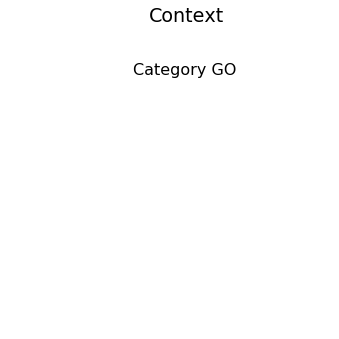

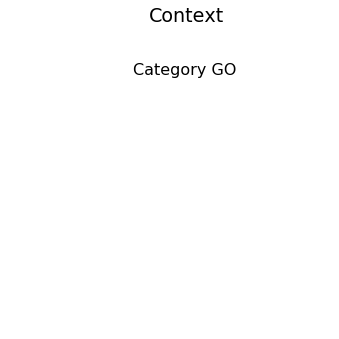

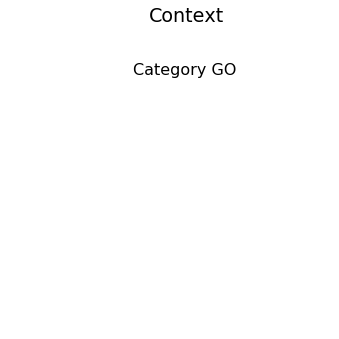

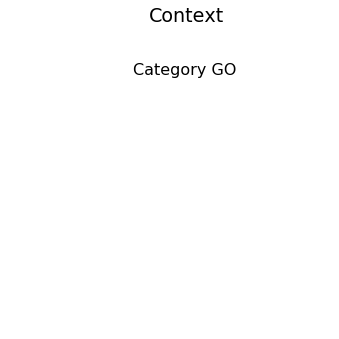

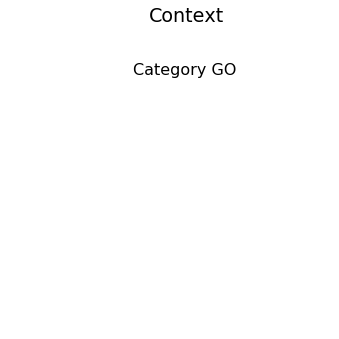

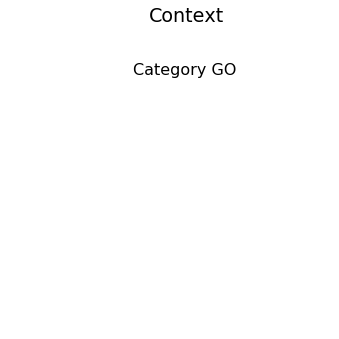

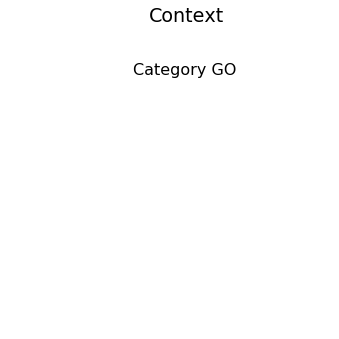

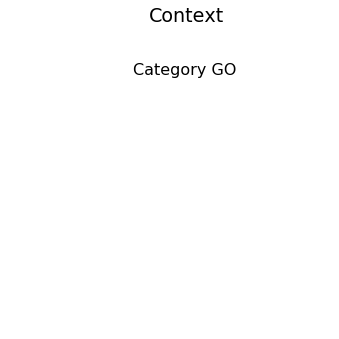

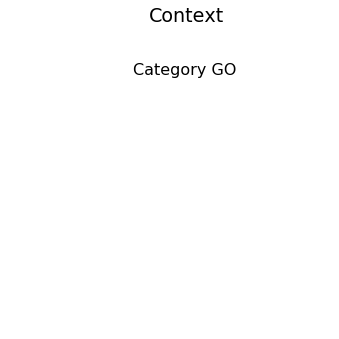

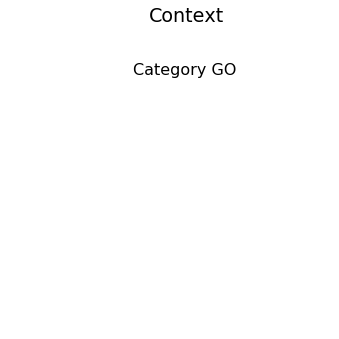

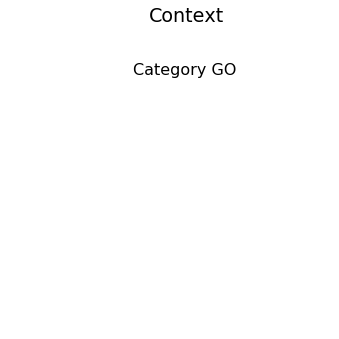

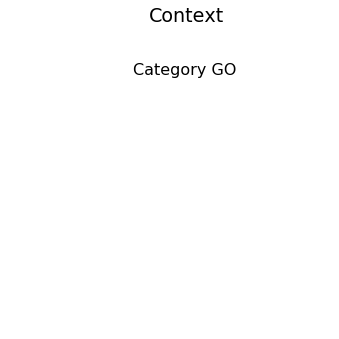

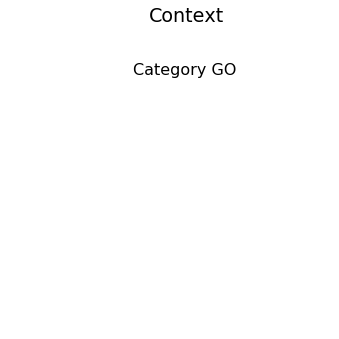

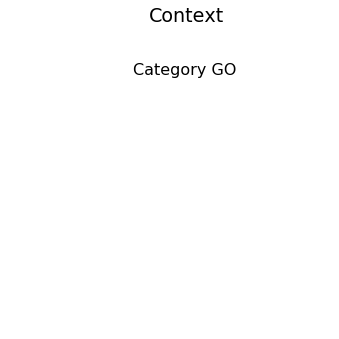

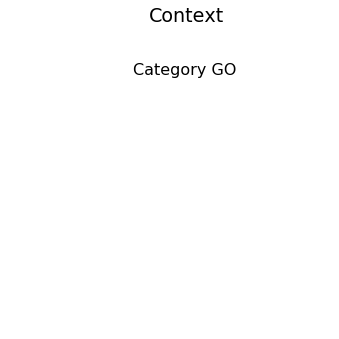

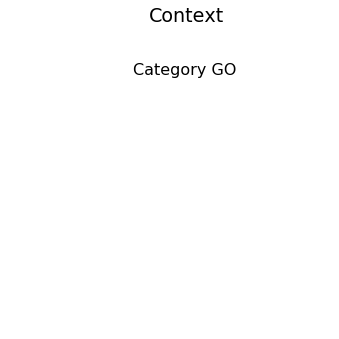

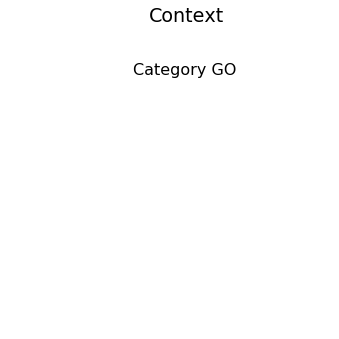

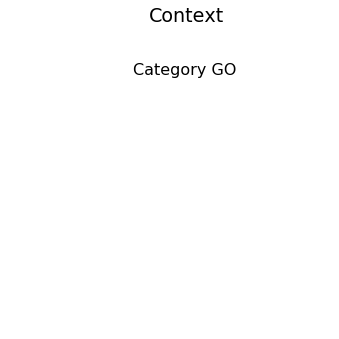

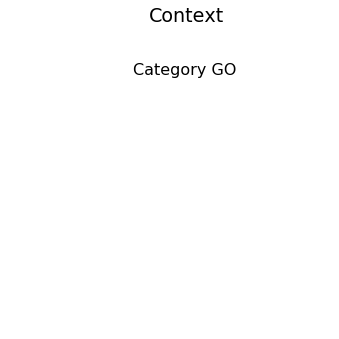

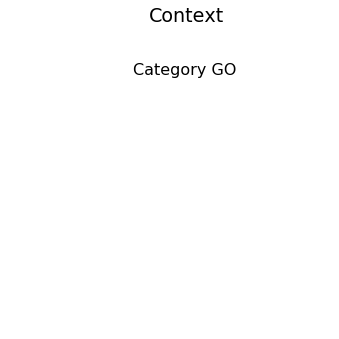

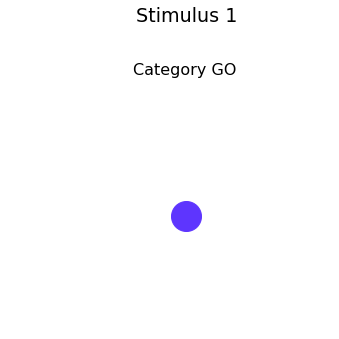

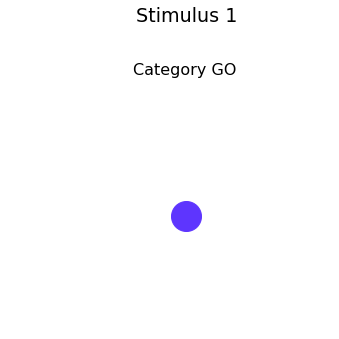

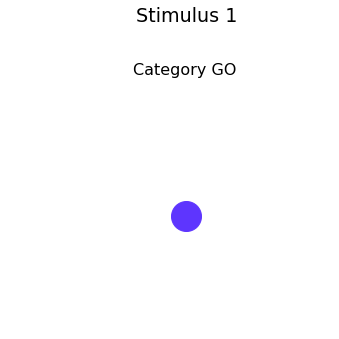

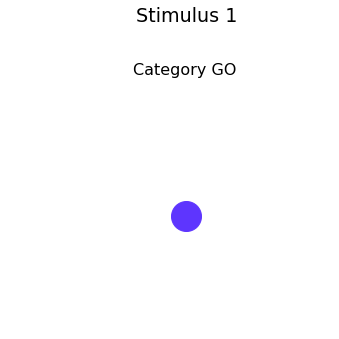

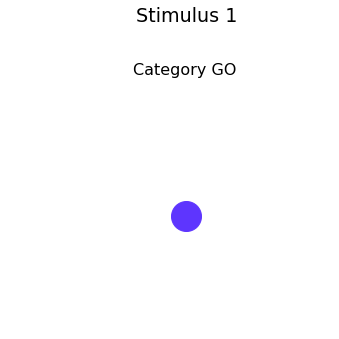

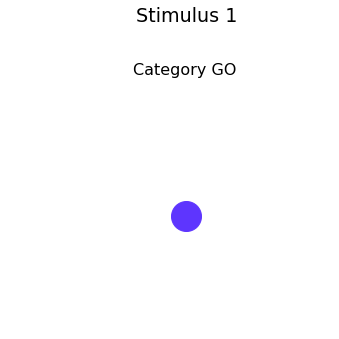

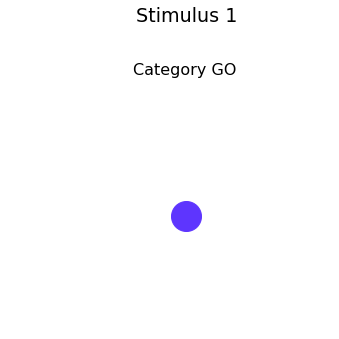

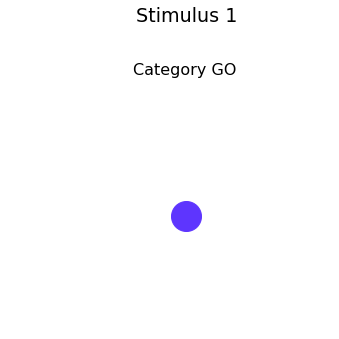

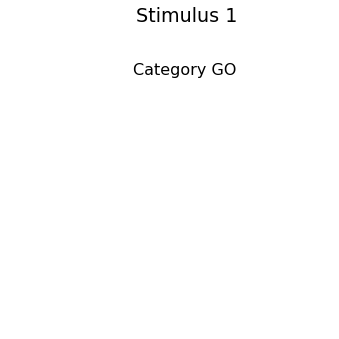

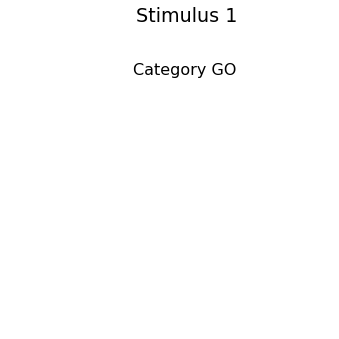

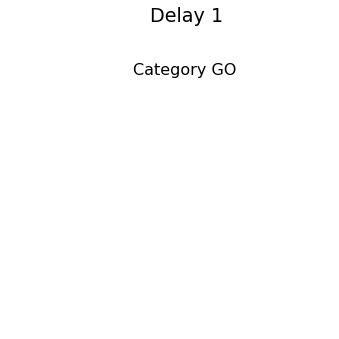

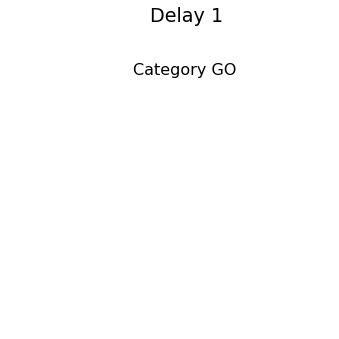

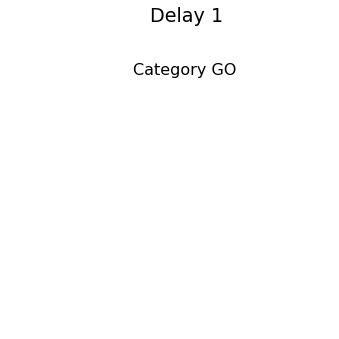

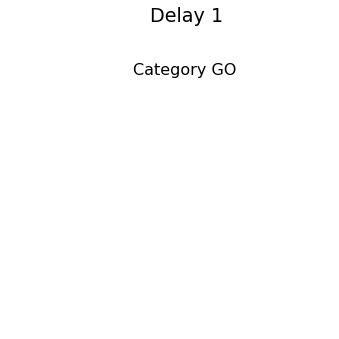

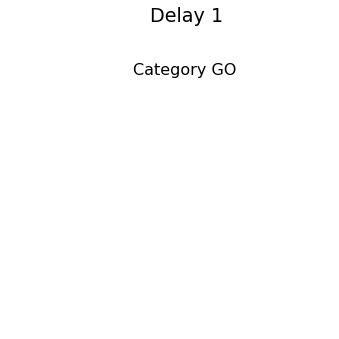

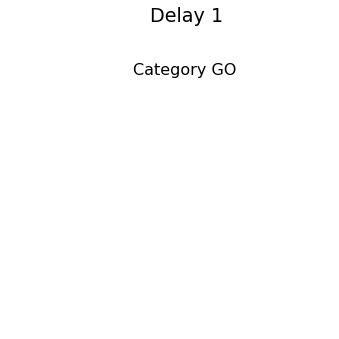

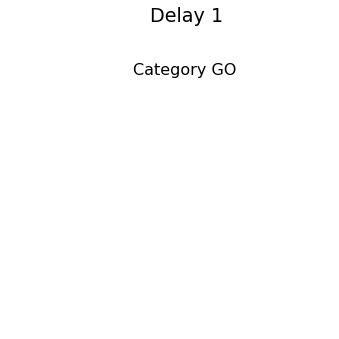

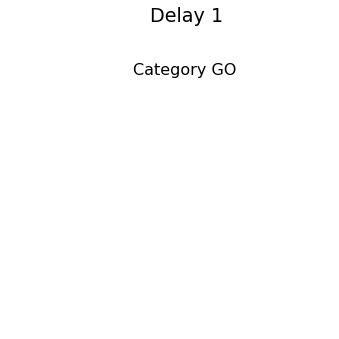

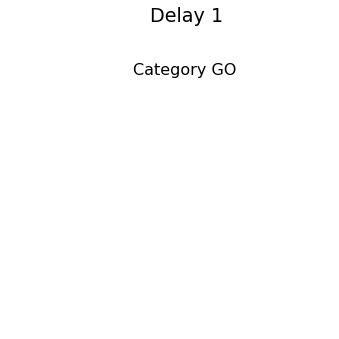

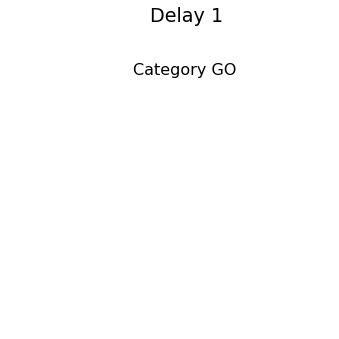

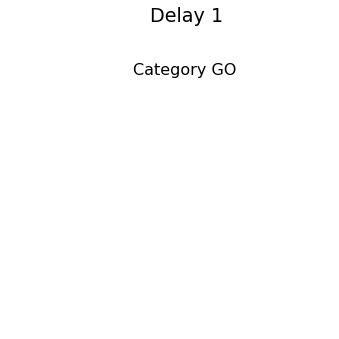

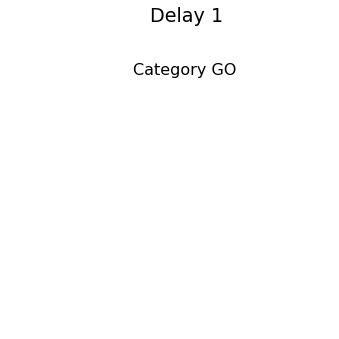

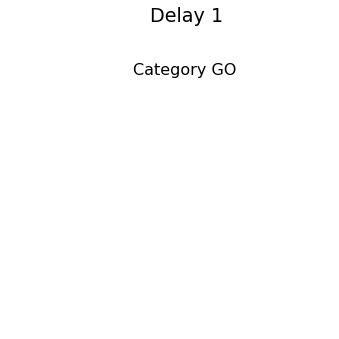

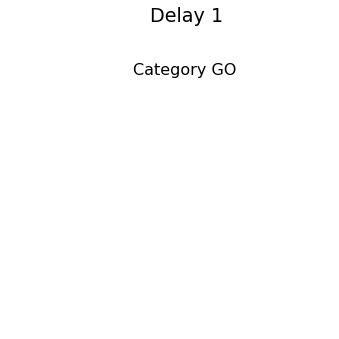

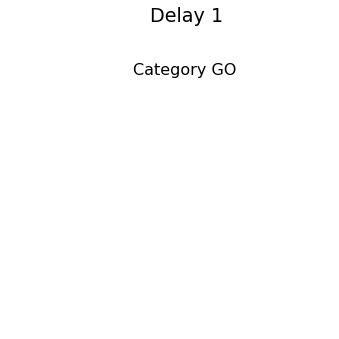

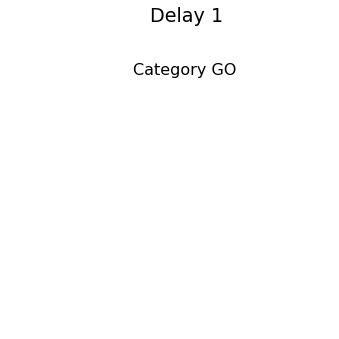

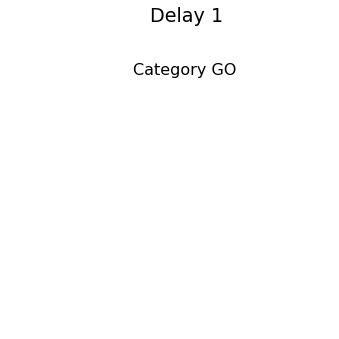

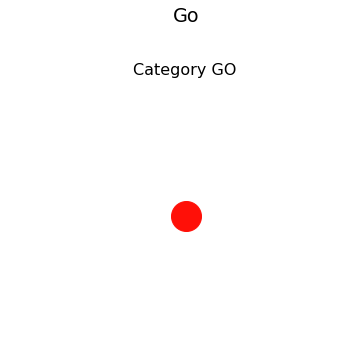

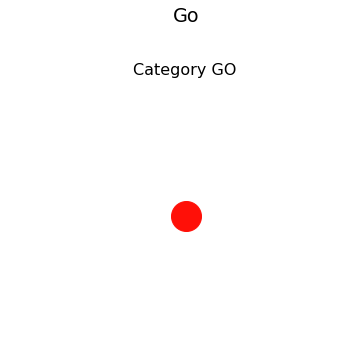

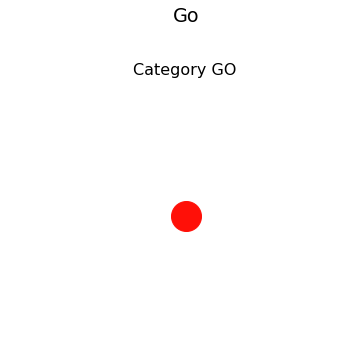

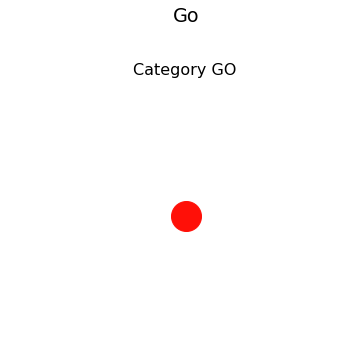

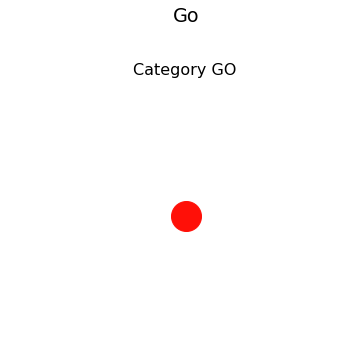

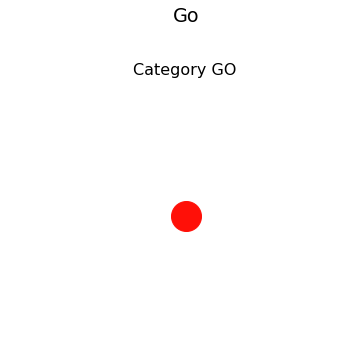

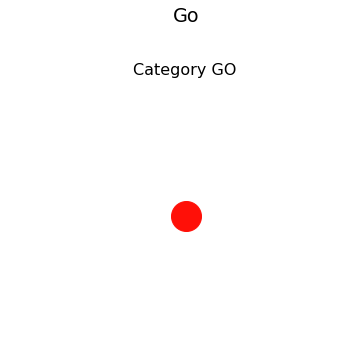

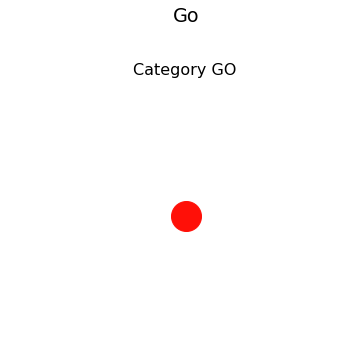

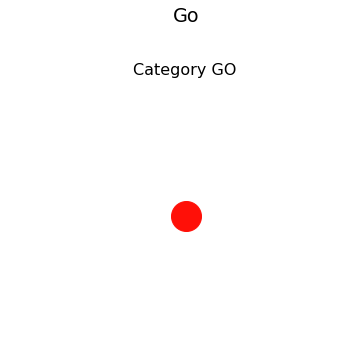

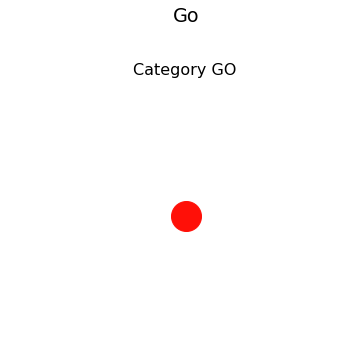

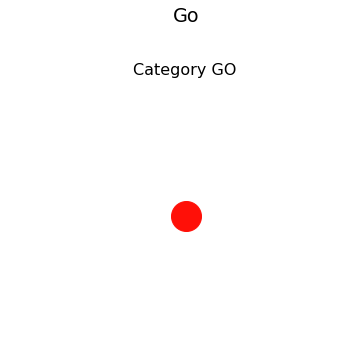

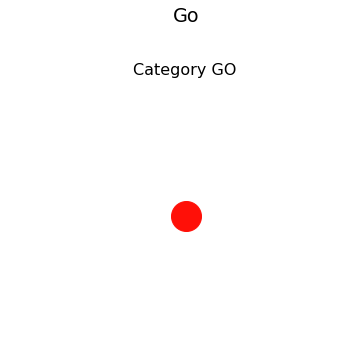

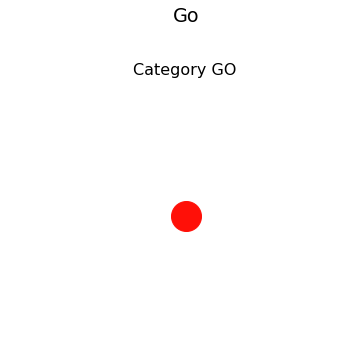

In [12]:
cmap=plt.get_cmap('rainbow')
model_n = 0
if net is 'stepnet':
    dir_specific_all = 'crystals/softplus/l2w0001'#'crystals/softplus/l2h00001'#'stepnet/crystals/softplus/'#grad_norm_both/'#'lowD/combos'#'stepnet/lowD/tanh'#'lowD/grad_norm_l2001' #' #'lowD/armnet_noreg'#lowD/combos' ##grad_norm_l2h000001' /Documents/data/rnn/multitask/varGo/lowD/most/
elif net is 'highd_inputs':
    dir_specific_all = 'crystals/highd_inputs/all_rules_4/softplus/no_reg_tune_width'#'crystals/softplus/l2h00001'#'stepnet/crystals/softplus/'#grad_norm_both/'#'lowD/combos'#'stepnet/lowD/tanh'#'lowD/grad_norm_l2001' #' #'lowD/armnet_noreg'#lowD/combos' ##grad_norm_l2h000001' /Documents/data/rnn/multitask/varGo/lowD/most/
#     dir_specific_all = 'crystals/highd_inputs/all_rules_32/softplus/l2h00001_l2w0001'#'crystals/softplus/l2h00001'#'stepnet/crystals/softplus/'#grad_norm_both/'#'lowD/combos'#'stepnet/lowD/tanh'#'lowD/grad_norm_l2001' #' #'lowD/armnet_noreg'#lowD/combos' ##grad_norm_l2h000001' /Documents/data/rnn/multitask/varGo/lowD/most/
elif net is 'armnet':
    dir_specific_all = 'lowD/armnet_noreg/most/'#'crystals/softplus/l2h00001'#'stepnet/crystals/softplus/'#grad_norm_both/'#'lowD/combos'#'stepnet/lowD/tanh'#'lowD/grad_norm_l2001' #' #'lowD/armnet_noreg'#lowD/combos' ##grad_norm_l2h000001' /Documents/data/rnn/multitask/varGo/lowD/most/

rule = 'dmcgo'
noise_on = False
model = Model(model_dir_all)
with tf.Session() as sess:
    model.saver.restore(sess,ckpt_n_dir)
    # get all connection weights and biases as tensorflow variables
    var_list = model.var_list
    # evaluate the parameters after training
    params = [sess.run(var) for var in var_list]
    # get hparams
    hparams = model.hp
    trial_master = generate_trials(rule, hparams, mode = 'random', batch_size = 200, noise_on=noise_on, delay_fac =1)   

trial_ind = 14
task_name = 'Category GO'

movie_dir = os.path.join(model_dir_all,'lowDin schematic/',task_name)
if not os.path.exists(movie_dir):
    os.makedirs(movie_dir)
    
trial_x = trial_master.x[:,trial_ind,:]
y_trial_subset = trial_master.y[:,trial_ind,1:]
T,N = np.shape(trial_x)

stim1_locs_mod1 = cmap(trial_master.stim_locs[trial_ind,0]/(np.pi*2))
stim2_locs_mod1 = cmap(trial_master.stim_locs[trial_ind,1]/(np.pi*2))
stim1_locs_mod2 = cmap(trial_master.stim_locs[trial_ind,2]/(np.pi*2))
stim2_locs_mod2 = cmap(trial_master.stim_locs[trial_ind,3]/(np.pi*2))


for t in range(0,T):
    fig = plt.figure(figsize=(5, 5),tight_layout=True,facecolor='white')
    plt.rcParams.update({'font.size': 16})
    
    plt.title('Context')
    plt.text(-.4,.5,task_name)
    if t>(trial_master.epochs['go1'][0]+1):
        plt.plot(0,0,'o',markersize = 30*np.sqrt(trial_x[t,1]**2+trial_x[t,2]**2),
                 c = stim2_locs_mod1)
        plt.plot(0,-1,'o',markersize = 30*np.sqrt(trial_x[t,3]**2+trial_x[t,4]**2),
                 c = stim2_locs_mod2)
#         plt.plot(0,-1,'o',markersize = 20*np.sqrt(trial_x[t,3]**2+trial_x[t,4]**2),
#                  c = 'w')
        plt.title('Go')
#     elif t>(trial_master.epochs['delay2'][0]+1):
#         plt.title('Delay 2')
#     elif t>(trial_master.epochs['stim2'][0]+1):
#         plt.plot(0,0,'o',markersize = 30*np.sqrt(trial_x[t,1]**2+trial_x[t,2]**2),
#                  c = stim2_locs_mod1)
#         plt.plot(0,-1,'o',markersize = 30*np.sqrt(trial_x[t,3]**2+trial_x[t,4]**2),
#                  c = stim2_locs_mod2)
#         plt.plot(0,-1,'o',markersize = 25*np.sqrt(trial_x[t,3]**2+trial_x[t,4]**2),
#                  c = 'w')
#         plt.title('Stimulus 2')
    elif t>(trial_master.epochs['delay1'][0]+1):
        plt.title('Delay 1')
    elif t>(trial_master.epochs['stim1'][0]+1):
        plt.plot(0,0,'o',markersize = 30*np.sqrt(trial_x[t,1]**2+trial_x[t,2]**2),
                 c = stim1_locs_mod1)
        plt.plot(0,-1,'o',markersize = 30*np.sqrt(trial_x[t,3]**2+trial_x[t,4]**2),
                 c = stim1_locs_mod2)
#         plt.plot(0,-1,'o',markersize = 25*np.sqrt(trial_x[t,3]**2+trial_x[t,4]**2),
#                  c = 'w')
        plt.title('Stimulus 1')
    
    plt.xlim((-1,1))
    plt.ylim((-2,1))
    plt.axis('off')
    plt.savefig(movie_dir +'/'+ str(t) + '.png')
    plt.show()
    
images = []
for t in range(T):#T*xt):
    filename = movie_dir +'/'+ str(t) + '.png'
    images.append(imageio.imread(filename))
imageio.mimsave(movie_dir+'/movie.gif', images)